---
# What is our Motivation?

Our Motivation:  

Our group has chanced upon an article about Singapores happiness score faring at 6.4 points, the highest amongst its immediate regional neighbour countries. 

Thailand trails close with 6 points, followed by the Philippines with 5.9, Malaysia and Vietnam at 5.4, Indonesia with 5.3, and finally Myanmar with 4.4 points

We then wanted to figure out what factors came to play when deciding the happiness score of a country. Aside from sieving out the important factors that contributed to the happiness score, we wanted to use existing data to build a model to predict future data.

We will be considering various regression models to do so, and this leads to our problem statement:

# Problem Statement

To build a model that best predicts the life ladder of different countries considering various regression model.

We decided to predict the 2019 life ladder of different countries by using various machine learning models on data from 2018 and older.


---

# Import necessary libraries

In [5]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [6]:
data = pd.read_excel('HappinessIndexDataActual.xls')
data.head(n=10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,2013,3.572100,7.499845,0.483552,52.560001,0.577955,0.072033,0.823204,0.620585,...,NaN,NaN,0.304368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,2014,3.130896,7.493170,0.525568,52.880001,0.508514,0.114906,0.871242,0.531691,...,NaN,NaN,0.413974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,2015,3.982855,7.476808,0.528597,53.200001,0.388928,0.090780,0.880638,0.553553,...,NaN,NaN,0.596918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,2016,4.220169,7.471376,0.559072,53.000000,0.522566,0.053188,0.793246,0.564953,...,NaN,NaN,0.418629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,2017,2.661718,7.472197,0.490880,52.799999,0.427011,-0.110382,0.954393,0.496349,...,NaN,NaN,0.286599,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
# Description of the dataset

We extracted the dataset from World Happiness Report. Learn more: https://worldhappiness.report/ed/2019/#appendices-and-data

[Refer to ANNEX A for GALLUP WORLD POLL (GWP) QUESTIONS]

Country name : Name of different Countries

Year : 2000-2019

Life Ladder : 0 (Worst) - 10 (Best)

Log GDP per capital : GDP Per Capita of a country

Social support : National average of the binary responses (either 0 or 1) to the GWP question

Healthy life expectancy at birth : Average number of years that a newborn is expected to live if current mortality rates continue to apply

Freedom to make life choices : National average of binary responses to the GWP question

Generosity : Residual of regressing the national average of GWP responses on GDP per capita

Perceptions of corruption : Average of binary answers (either 0 or 1) to two GWP questions

Positive affect : Average of three positive affect measures in
GWP: happiness, laugh and enjoyment in GWP Poll <br>

Negative affect : Average of three negative affect measures in
GWP: worry, sadness and anger in GWP Poll <br>

Confidence in national government : Share of people who report having confidence in the national government. <br>

Democratic Quality : Simple average of the first 2 dimensions of governance: Voice and Accountability, Political Stability and Absence of Violence <br>

Delivery Quality : Simple average of the other four dimensions of governance: Government Effectiveness, Regulatory Quality, Rule of Law, Control of Corruption. <br>

Standard deviation of ladder by country-year : - <br>

Standard deviation/Mean of ladder by country-year : - <br>

GINI index (World Bank estimate) : 0 (perfect equality) - 1 (perfect inequality) <br>

GINI index (World Bank estimate), average 2000-16 : 0 (perfect equality) - 1 (perfect inequality) <br>

In [7]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1848, 26)


---
#### To check if our data is suitable to obtain valuable insights, we checked the initally correlation of all the variables

In [8]:
data.corr()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
year,1.000000,0.005903,0.048507,-0.032555,0.133141,0.193448,-0.045407,-0.071487,-0.010126,0.190224,...,-0.026638,-0.013047,0.087832,-0.075839,0.024444,-0.008107,0.023192,-0.015845,0.014883,-0.003251
Life Ladder,0.005903,1.000000,0.776676,0.704046,0.741604,0.523349,0.196849,-0.422653,0.538692,-0.294381,...,-0.103735,-0.206277,-0.305454,0.189750,0.566726,-0.255001,0.472907,0.264004,0.482325,0.350993
Log GDP per capita,0.048507,0.776676,1.000000,0.678557,0.829849,0.361548,-0.000773,-0.342296,0.309026,-0.202075,...,-0.327123,-0.328211,-0.384798,0.125259,0.834240,-0.012113,0.473325,0.413786,0.444393,0.397924
Social support,-0.032555,0.704046,0.678557,1.000000,0.612411,0.409955,0.066356,-0.214311,0.437488,-0.397009,...,-0.141701,-0.163933,-0.348339,0.146075,0.541457,-0.169073,0.259911,-0.032068,0.438760,0.309804
Healthy life expectancy at birth,0.133141,0.741604,0.829849,0.612411,1.000000,0.378726,0.030108,-0.315927,0.321633,-0.141312,...,-0.228823,-0.344571,-0.433304,0.037197,0.494139,0.181531,0.434663,0.294824,0.441414,0.315227
Freedom to make life choices,0.193448,0.523349,0.361548,0.409955,0.378726,1.000000,0.334219,-0.490592,0.609238,-0.275670,...,0.061439,0.028577,0.094864,0.258122,0.582594,0.302300,0.365811,0.224279,0.429242,0.297965
Generosity,-0.045407,0.196849,-0.000773,0.066356,0.030108,0.334219,1.000000,-0.299612,0.359531,-0.094195,...,-0.077671,-0.095106,0.172772,0.175552,0.664753,-0.207824,0.421578,0.201841,0.396931,0.318659
Perceptions of corruption,-0.071487,-0.422653,-0.342296,-0.214311,-0.315927,-0.490592,-0.299612,1.000000,-0.299189,0.262712,...,0.181727,0.198032,-0.022701,-0.529746,-0.797639,0.117627,-0.634808,-0.349372,-0.527919,-0.518807
Positive affect,-0.010126,0.538692,0.309026,0.437488,0.321633,0.609238,0.359531,-0.299189,1.000000,-0.376029,...,0.353596,0.271111,0.143334,0.116428,0.036518,0.189914,0.264843,0.114875,0.302334,0.161643
Negative affect,0.190224,-0.294381,-0.202075,-0.397009,-0.141312,-0.275670,-0.094195,0.262712,-0.376029,1.000000,...,0.193259,0.135437,0.206416,-0.385157,-0.409924,-0.590149,-0.461686,0.011567,-0.402042,-0.416747


---
# Data visualisation & Data Cleaning


# Analyse what kind of data each variable holds and see if there is any missing data

Firstly, we have to see what is the type of data of each variable in our dataset.



In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 26 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Country name                                                           1848 non-null   object 
 1   year                                                                   1848 non-null   int64  
 2   Life Ladder                                                            1848 non-null   float64
 3   Log GDP per capita                                                     1819 non-null   float64
 4   Social support                                                         1835 non-null   float64
 5   Healthy life expectancy at birth                                       1796 non-null   float64
 6   Freedom to make life choices                                           1817 non-null   f


We want to know how many missing data each variable in our dataset has.

We used isna() function to find out the number of missing data point our dataset

In [10]:
data.isna().sum()

Country name                                                                0
year                                                                        0
Life Ladder                                                                 0
Log GDP per capita                                                         29
Social support                                                             13
Healthy life expectancy at birth                                           52
Freedom to make life choices                                               31
Generosity                                                                 83
Perceptions of corruption                                                 103
Positive affect                                                            21
Negative affect                                                            15
Confidence in national government                                         191
Democratic Quality                                              

---
# Visualise the number of missing data

We make use of the missingno library to plot a bar graph. Each bar represents a column within the data frame. The height of the bar indicates how complete that column. 





In [11]:
#importing the library
import missingno as msno

<AxesSubplot:>

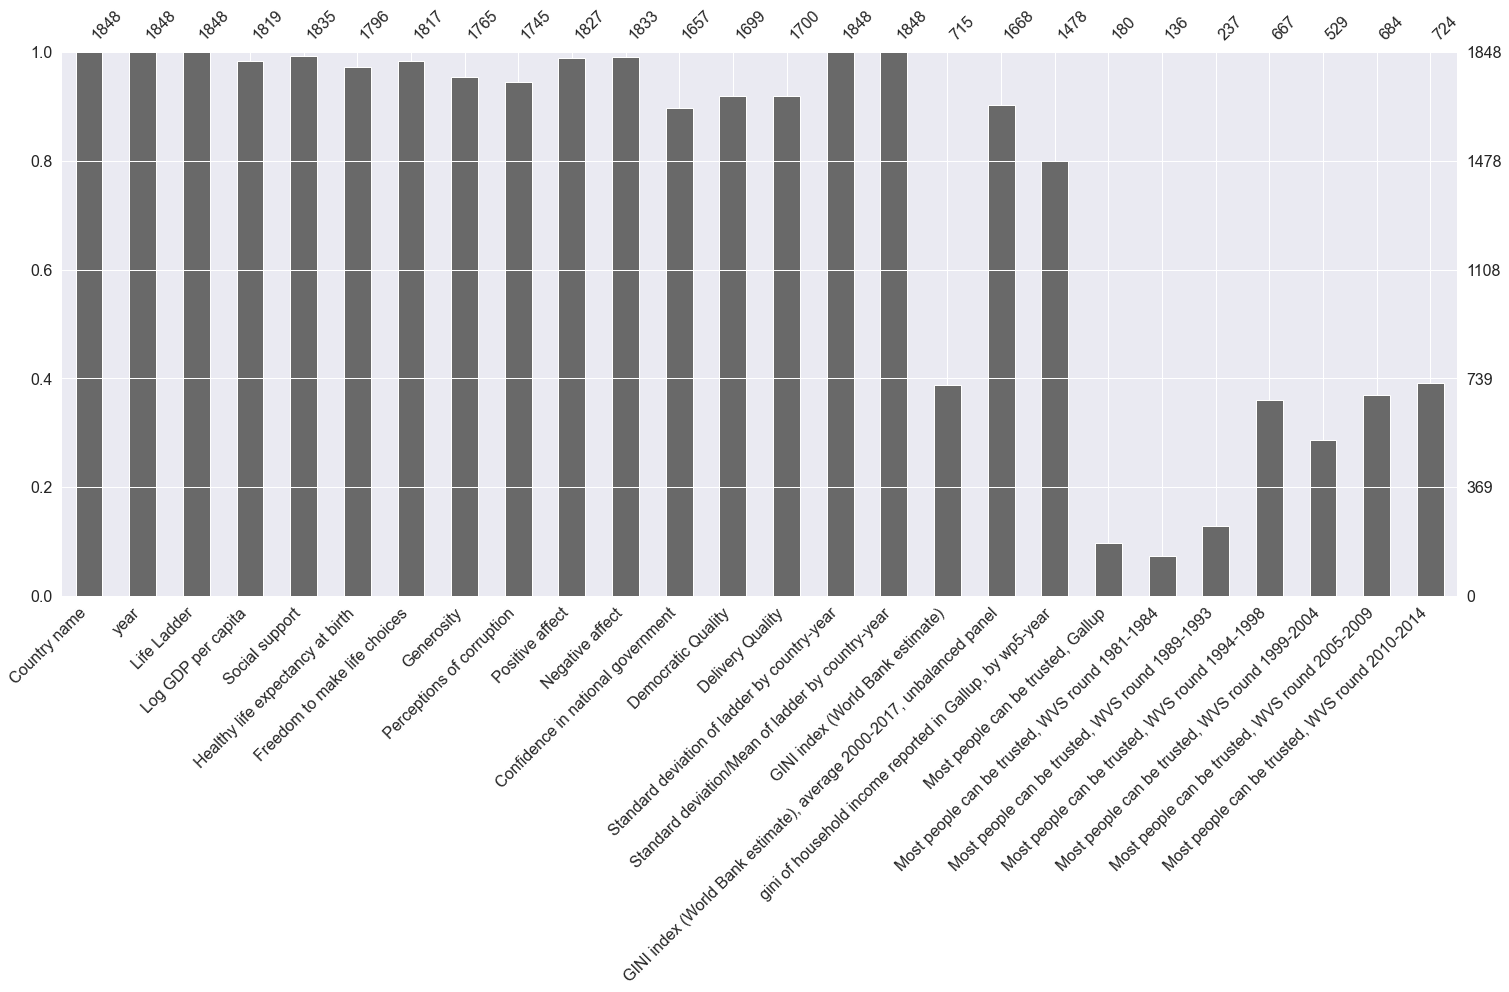

In [12]:
msno.bar(data)

# Explanation of the bar graph above

On the left side of the plot, the y-axis scale ranges from 0.0 to 1.0, where 1.0 represents 100% data completeness. If the bar is less than this, it indicates that we have missing values within that column.

On the right side of the plot, the scale is measured in index values. With the top right representing the maximum number of rows within the dataframe.

Along the top of the plot, there are a series of numbers that represent the total count of the non-null values within that column.

Hence we can see that for certain variables, the height of the bar is significantly low. Those variables have more than 50% missing data.

With that information, we decide to find out the exact percentage of missing data using those variables we identified above.

---

In [13]:
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)


Country name                                                              0.00
year                                                                      0.00
Life Ladder                                                               0.00
Log GDP per capita                                                        1.57
Social support                                                            0.70
Healthy life expectancy at birth                                          2.81
Freedom to make life choices                                              1.68
Generosity                                                                4.49
Perceptions of corruption                                                 5.57
Positive affect                                                           1.14
Negative affect                                                           0.81
Confidence in national government                                        10.34
Democratic Quality                                  

# Dropping variables because it contains too many missing data
As we can see, some of the variables have more than 60% missing data and we decided to drop the entire column because filling up the data is not feasible. Hence for the first round of data-cleaning, we decide to drop these variables.

Variables dropped
---
1. 'GINI index (World Bank estimate)'
2. 'GINI index (World Bank estimate), average 2000-2017, unbalanced panel'
3. 'gini of household income reported in Gallup, by wp5-year'
4. 'Most people can be trusted, Gallup'
5. 'Most people can be trusted, WVS round 1981-1984'
6. 'Most people can be trusted, WVS round 1989-1993'
7. 'Most people can be trusted, WVS round 1994-1998'
8. 'Most people can be trusted, WVS round 1999-2004'
9. 'Most people can be trusted, WVS round 2005-2009'
10. 'Most people can be trusted, WVS round 2010-2014'


# Dropping variables because it is irrelevant in predicting life ladder

For the variables below, the standard deviation/ Mean of ladder by country year only measure of the amount of variation of lide ladder and it is not relevant in predicting life ladder. Hence we decide to drop the 2 variable below.

Variables dropped
---
1. 'Standard deviation of ladder by country-year' 
2. 'Standard deviation/Mean of ladder by country-year',
3. 'Country name'

---

In [14]:
data_dropped_1 = data.drop([  'Standard deviation of ladder by country-year', 
                              'Standard deviation/Mean of ladder by country-year',
                              'Country name',
                              'GINI index (World Bank estimate)', 
                              'GINI index (World Bank estimate), average 2000-2017, unbalanced panel', 
                              'gini of household income reported in Gallup, by wp5-year',
                              'Most people can be trusted, Gallup',
                              'Most people can be trusted, WVS round 1981-1984',
                              'Most people can be trusted, WVS round 1989-1993',
                              'Most people can be trusted, WVS round 1994-1998',
                              'Most people can be trusted, WVS round 1999-2004',
                              'Most people can be trusted, WVS round 2005-2009',
                              'Most people can be trusted, WVS round 2010-2014'], axis=1)

In [15]:
data_dropped_1

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
0,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084
1,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025
2,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176
3,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221
4,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,2015,3.703191,7.827643,0.735800,53.799999,0.667193,-0.117035,0.810457,0.715079,0.178861,0.590012,-0.892030,-1.359854
1844,2016,3.735400,7.819675,0.768425,54.400002,0.732971,-0.088488,0.723612,0.737636,0.208555,0.699344,-0.900462,-1.376520
1845,2017,3.638300,7.851042,0.754147,55.000000,0.752826,-0.091540,0.751208,0.806428,0.224051,0.682647,-0.952548,-1.350873
1846,2018,3.616480,7.896704,0.775388,55.599998,0.762675,-0.063282,0.844209,0.710119,0.211726,0.550508,-0.920905,-1.323000


---
# Filling up of missing data

After dropping those variables, we will fill up those data that are empty. We decide to use the median of each variable as it is the least biased method to fill the data because mean can be affected by outliers which can be an inaccurate representation of the data.

In [16]:
for var in data_dropped_1:
    try:
        data_dropped_1[var].fillna(data_dropped_1[var].median(),inplace=True)
    except:
        continue

In [17]:
data_dropped_1

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality
0,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084
1,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025
2,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176
3,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221
4,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,2015,3.703191,7.827643,0.735800,53.799999,0.667193,-0.117035,0.810457,0.715079,0.178861,0.590012,-0.892030,-1.359854
1844,2016,3.735400,7.819675,0.768425,54.400002,0.732971,-0.088488,0.723612,0.737636,0.208555,0.699344,-0.900462,-1.376520
1845,2017,3.638300,7.851042,0.754147,55.000000,0.752826,-0.091540,0.751208,0.806428,0.224051,0.682647,-0.952548,-1.350873
1846,2018,3.616480,7.896704,0.775388,55.599998,0.762675,-0.063282,0.844209,0.710119,0.211726,0.550508,-0.920905,-1.323000


In [18]:
data_dropped_1.isna().sum()


year                                 0
Life Ladder                          0
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                           0
Perceptions of corruption            0
Positive affect                      0
Negative affect                      0
Confidence in national government    0
Democratic Quality                   0
Delivery Quality                     0
dtype: int64

Now all the missing data has been filled up and we can move on to the analysis of our dataset
---

Firstly, we decide to look at the correlation of the variables in our dataset. To visualise the correlation, we plot out the correlation matrix.

We first plotted the heatmap of all the variables against each other to find out the correaltion and how strongly are each variables against one another

<AxesSubplot:>

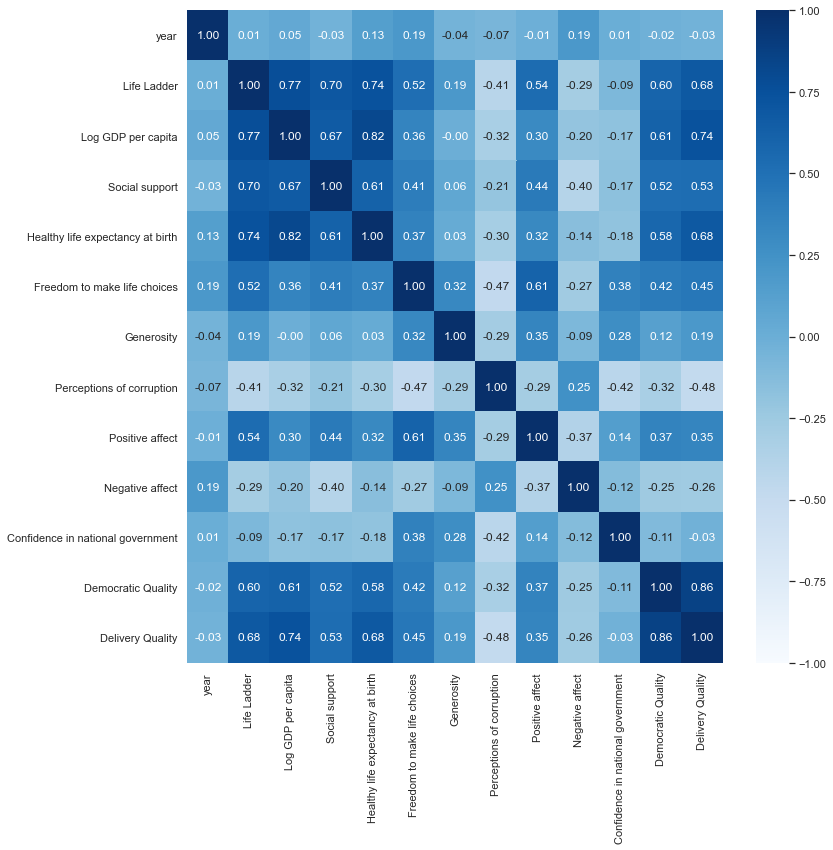

In [19]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(data_dropped_1.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f",cmap="Blues")


In [20]:
focus_cols = ['Life Ladder']
data_dropped_1.corr().filter(focus_cols).drop(focus_cols).sort_values( by = "Life Ladder",key = abs,ascending=False)

,Life Ladder
Log GDP per capita,0.773151
Healthy life expectancy at birth,0.738266
Social support,0.702114
Delivery Quality,0.680153
Democratic Quality,0.595524
Positive affect,0.536969
Freedom to make life choices,0.520946
Perceptions of corruption,-0.410998
Negative affect,-0.293700
Generosity,0.189813


We then print out the correlation of each variable against life ladder and sort it. 


We can see that each variable against the life ladder the ranking is as follows (highest correlation to lowest correlation):

1. Log GDP per capita
2. Healthy life expectancy at birth
3. Social support
4. Delivery Quality
5. Democratic Quality
6. Positive affect
7. Freedom to make life choices
8. Perceptions of corruption
9. Negative affect
10. Generosity
11. Confidence in national government

From the correlation table, we can see that the three variable "Confidence in national government", "Generosity" and "Negative affect" has very low correlation. These three variable most likely have the least impact on "Life Ladder" and thus are the least important in predicting "Life Ladder".

To further prove this point, we decide to use uni-variate regression to evaluate the values of explained variance and mean square error as we predict life ladder. In particular we will look at the explained variance of the three variables above to decide if we will drop them.

---

# Uni-variate linear regression 

In [21]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [22]:
def traintest(dataframe, response, pred_list, testsize=0.2):
    # Recall the Dataset
    response_df = pd.DataFrame(dataframe[response])   # Response
    pred_df = pd.DataFrame(dataframe[pred_list])       # Predictor

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(pred_df, response_df, test_size = testsize)
    
    return [X_train, X_test, y_train, y_test]

In [23]:
def univariate(dataframe, traintest, var, dictionary):
    
    X_train = traintest[0]
    X_test = traintest[1]
    y_train = traintest[2]
    y_test = traintest[3]
    
        # Predictor



    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model



    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict Total values corresponding to HP
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    dictionary[var] = linreg.score(X_test, y_test)
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

    # check the preidction accuracy
    print("Prediction Accuracy of Model  \tTrain Dataset")
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train,y_train_pred)))

    print("Prediction Accuracy of Model \tTest Dataset")
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test,y_test_pred)))
    # regression line

    regline_X = X_train
    regline_y = linreg.coef_ * X_train + linreg.intercept_

    regline_Xt = X_test
    regline_yt = linreg.coef_ * X_test + linreg.intercept_

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(20, 12))
    axes[0].scatter(X_train, y_train, color = "blue")
    axes[0].plot(regline_X, regline_y, color='r', linewidth=2)
    
    axes[0].set_xlabel(var + " (Train)")
    axes[0].set_ylabel("Life Ladder (Train)")

    axes[1].scatter(X_test, y_test, color = "green")
    axes[1].plot(regline_Xt, regline_yt, color='r', linewidth=2)

    axes[1].set_xlabel(var + "(Test)")
    axes[1].set_ylabel("Life Ladder (Test)")
    plt.show()

Intercept of Regression 	: b =  [-1.42741345]
Coefficients of Regression 	: a =  [[0.74223857]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5964468729881034
Mean Squared Error (MSE) 	: 0.5009822407907757

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6012854128846953
Mean Squared Error (MSE) 	: 0.513544966227888

Prediction Accuracy of Model  	Train Dataset
Root Mean Squared Error (RMSE) 	: 0.7078009895378613
Prediction Accuracy of Model 	Test Dataset
Root Mean Squared Error (RMSE) 	: 0.7166205175878569


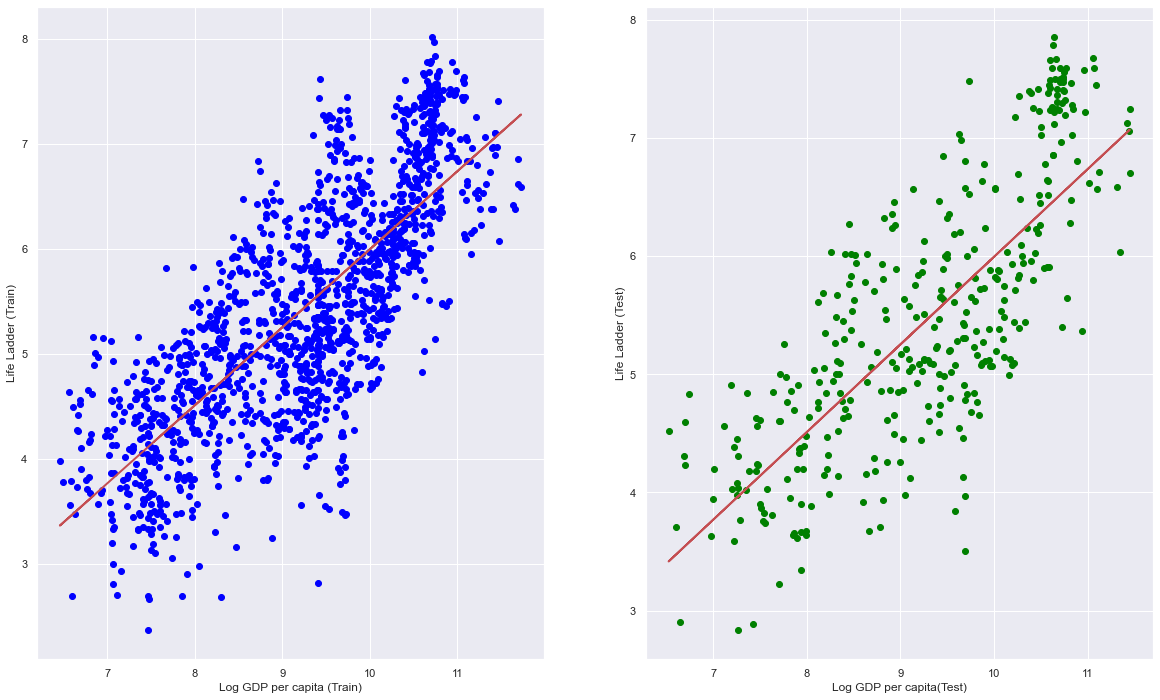

Intercept of Regression 	: b =  [0.02165761]
Coefficients of Regression 	: a =  [[6.69403071]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.49614479449631865
Mean Squared Error (MSE) 	: 0.6390033720780692

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.477764278382824
Mean Squared Error (MSE) 	: 0.6172325813278803

Prediction Accuracy of Model  	Train Dataset
Root Mean Squared Error (RMSE) 	: 0.7993768648629188
Prediction Accuracy of Model 	Test Dataset
Root Mean Squared Error (RMSE) 	: 0.7856415094226376


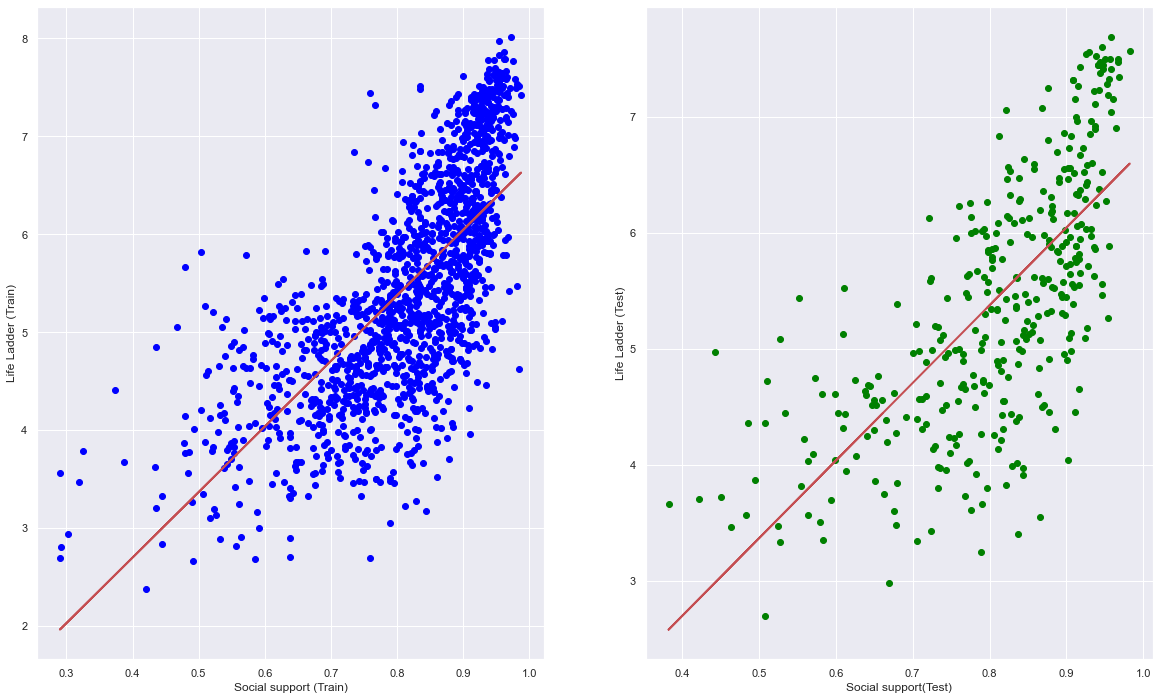

Intercept of Regression 	: b =  [-1.48697784]
Coefficients of Regression 	: a =  [[0.10982836]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5458072655483566
Mean Squared Error (MSE) 	: 0.5711926080164572

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5410914256151377
Mean Squared Error (MSE) 	: 0.563020763538977

Prediction Accuracy of Model  	Train Dataset
Root Mean Squared Error (RMSE) 	: 0.7557728547761273
Prediction Accuracy of Model 	Test Dataset
Root Mean Squared Error (RMSE) 	: 0.7503470953758514


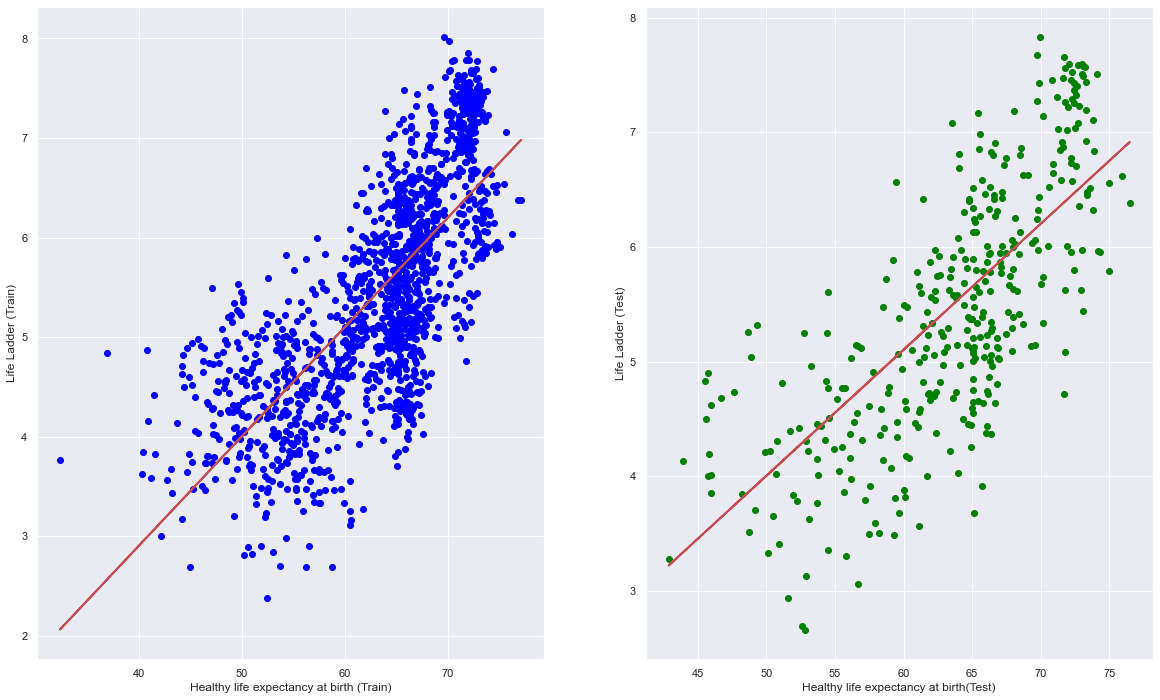

Intercept of Regression 	: b =  [2.31464263]
Coefficients of Regression 	: a =  [[4.25035043]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.27891227337290814
Mean Squared Error (MSE) 	: 0.9202858000538324

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.23537500054794613
Mean Squared Error (MSE) 	: 0.8804700582678834

Prediction Accuracy of Model  	Train Dataset
Root Mean Squared Error (RMSE) 	: 0.9593152766707265
Prediction Accuracy of Model 	Test Dataset
Root Mean Squared Error (RMSE) 	: 0.9383336604150377


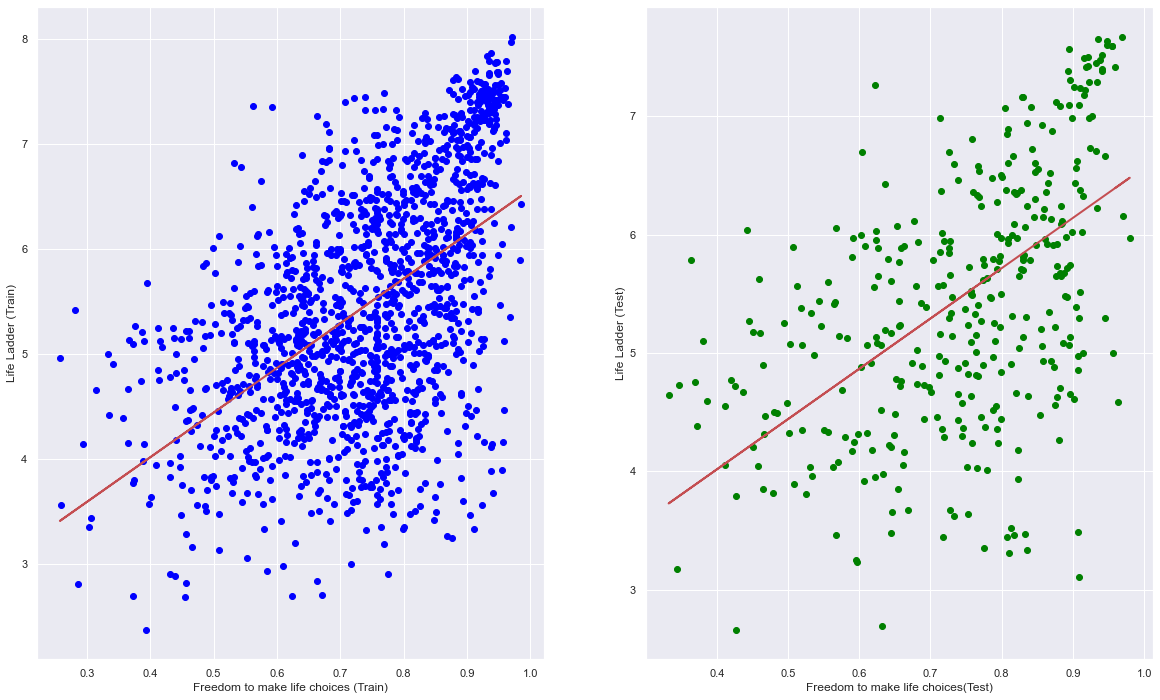

Intercept of Regression 	: b =  [5.44292254]
Coefficients of Regression 	: a =  [[1.3454439]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.036184488931011116
Mean Squared Error (MSE) 	: 1.2140264736340118

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.03528881154726016
Mean Squared Error (MSE) 	: 1.1758943711779788

Prediction Accuracy of Model  	Train Dataset
Root Mean Squared Error (RMSE) 	: 1.101828695230802
Prediction Accuracy of Model 	Test Dataset
Root Mean Squared Error (RMSE) 	: 1.0843866336219654


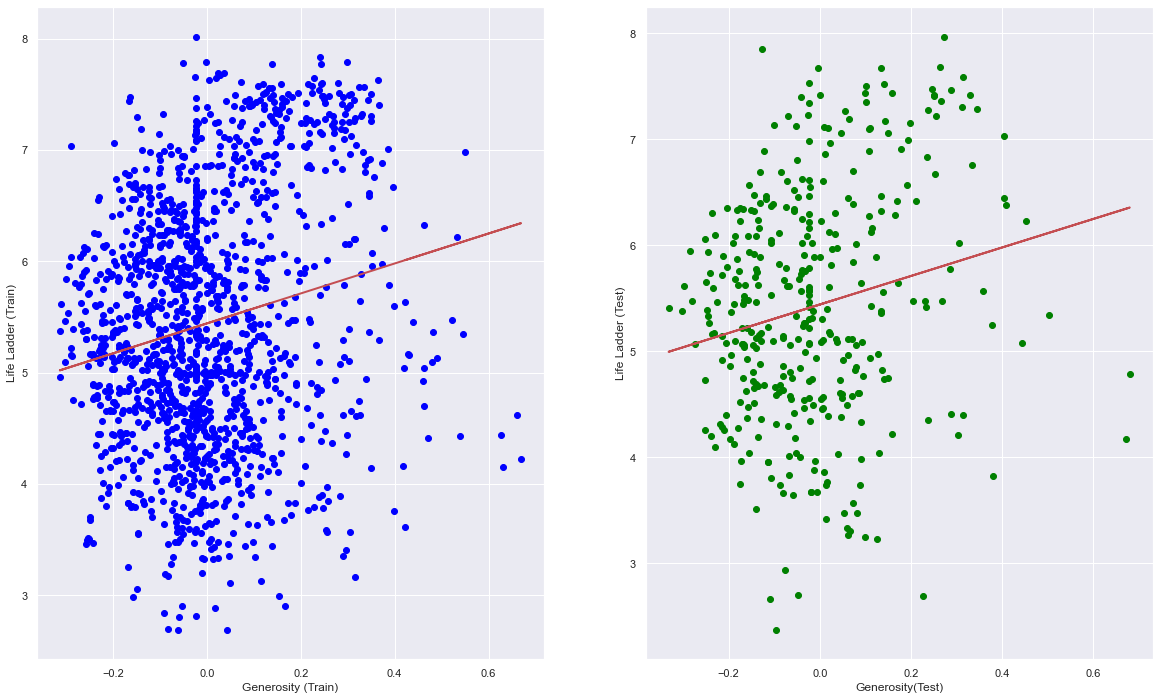

Intercept of Regression 	: b =  [7.33616103]
Coefficients of Regression 	: a =  [[-2.50048107]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1718946567374562
Mean Squared Error (MSE) 	: 1.0251619261022005

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.15413420246474607
Mean Squared Error (MSE) 	: 1.100266211486264

Prediction Accuracy of Model  	Train Dataset
Root Mean Squared Error (RMSE) 	: 1.0125028030095524
Prediction Accuracy of Model 	Test Dataset
Root Mean Squared Error (RMSE) 	: 1.048935751839103


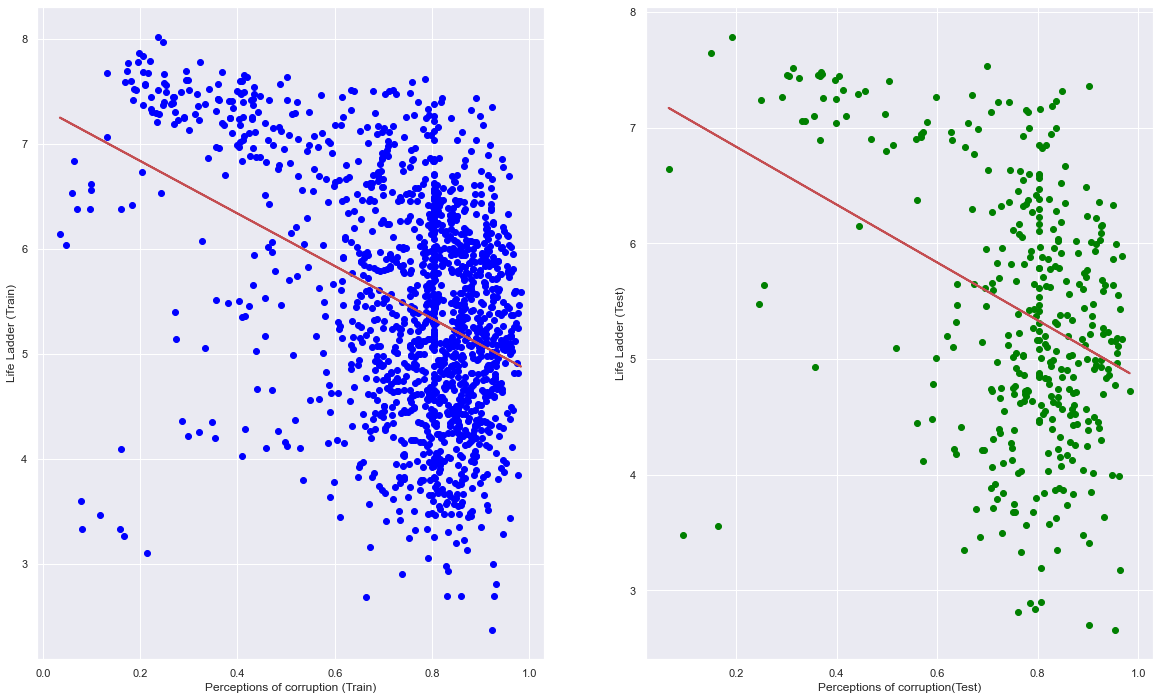

Intercept of Regression 	: b =  [1.46324971]
Coefficients of Regression 	: a =  [[5.61129017]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.29462380459938553
Mean Squared Error (MSE) 	: 0.866361871406222

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2619941730647781
Mean Squared Error (MSE) 	: 0.9875493402042068

Prediction Accuracy of Model  	Train Dataset
Root Mean Squared Error (RMSE) 	: 0.930785620541176
Prediction Accuracy of Model 	Test Dataset
Root Mean Squared Error (RMSE) 	: 0.9937551711584734


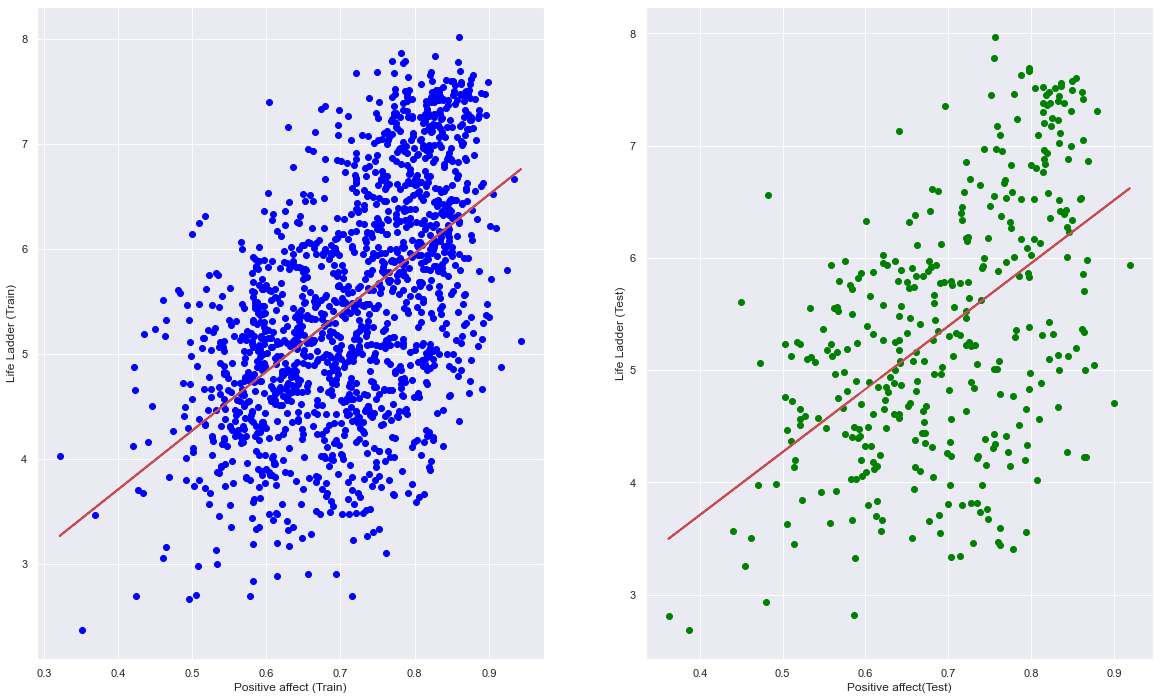

Intercept of Regression 	: b =  [6.49701905]
Coefficients of Regression 	: a =  [[-3.93614405]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.09332276906722703
Mean Squared Error (MSE) 	: 1.134124458576731

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.05775174780684367
Mean Squared Error (MSE) 	: 1.181133384441628

Prediction Accuracy of Model  	Train Dataset
Root Mean Squared Error (RMSE) 	: 1.0649527964077707
Prediction Accuracy of Model 	Test Dataset
Root Mean Squared Error (RMSE) 	: 1.0867996063863974


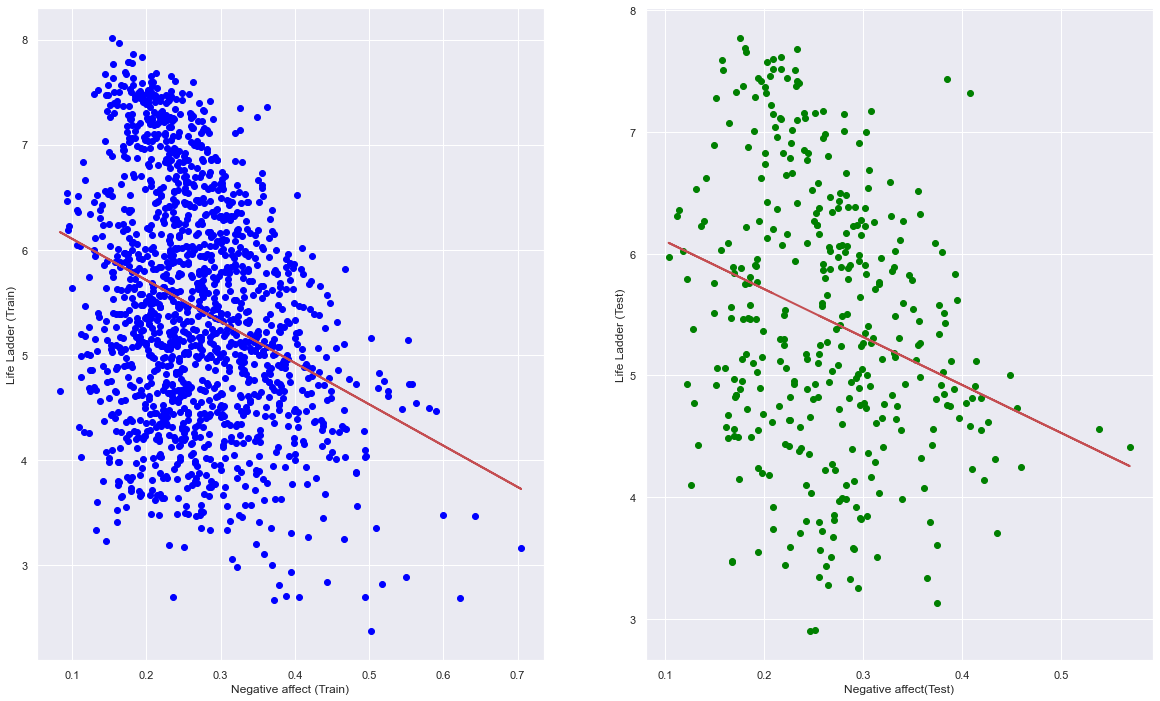

Intercept of Regression 	: b =  [5.72777082]
Coefficients of Regression 	: a =  [[-0.58462428]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.008869095668801452
Mean Squared Error (MSE) 	: 1.2493344830645368

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.003884375952914354
Mean Squared Error (MSE) 	: 1.2105576800936266

Prediction Accuracy of Model  	Train Dataset
Root Mean Squared Error (RMSE) 	: 1.1177363209024465
Prediction Accuracy of Model 	Test Dataset
Root Mean Squared Error (RMSE) 	: 1.100253461750349


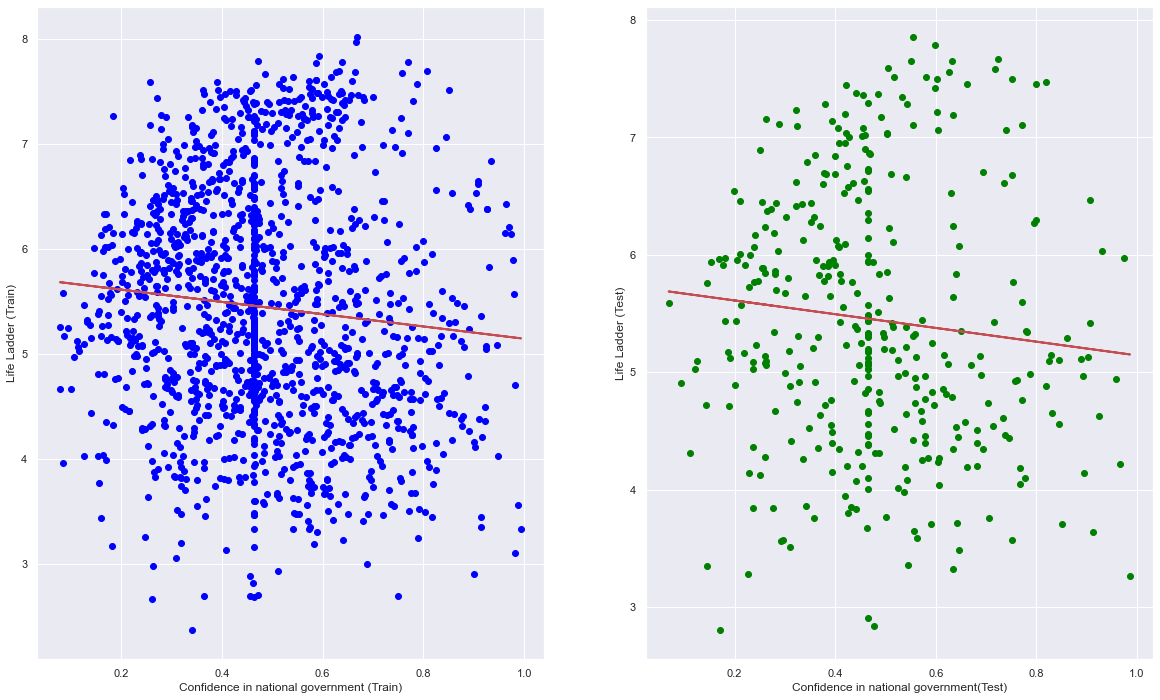

Intercept of Regression 	: b =  [5.54995562]
Coefficients of Regression 	: a =  [[0.78018005]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.34391071415788765
Mean Squared Error (MSE) 	: 0.8101063504178064

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.38954982936888405
Mean Squared Error (MSE) 	: 0.7986409639841726

Prediction Accuracy of Model  	Train Dataset
Root Mean Squared Error (RMSE) 	: 0.9000590816262044
Prediction Accuracy of Model 	Test Dataset
Root Mean Squared Error (RMSE) 	: 0.8936671438428139


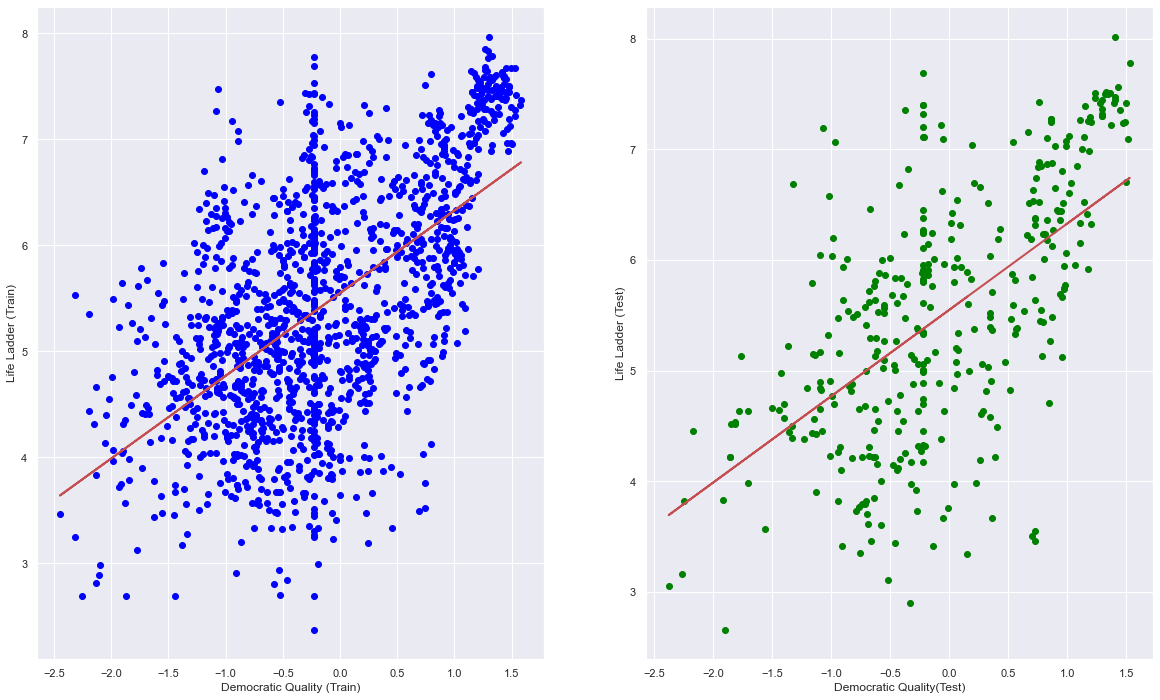

Intercept of Regression 	: b =  [5.46220988]
Coefficients of Regression 	: a =  [[0.80995732]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.4609264792402257
Mean Squared Error (MSE) 	: 0.6708713386385045

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.46798762679472583
Mean Squared Error (MSE) 	: 0.679152537622138

Prediction Accuracy of Model  	Train Dataset
Root Mean Squared Error (RMSE) 	: 0.8190673590361811
Prediction Accuracy of Model 	Test Dataset
Root Mean Squared Error (RMSE) 	: 0.8241071153813307


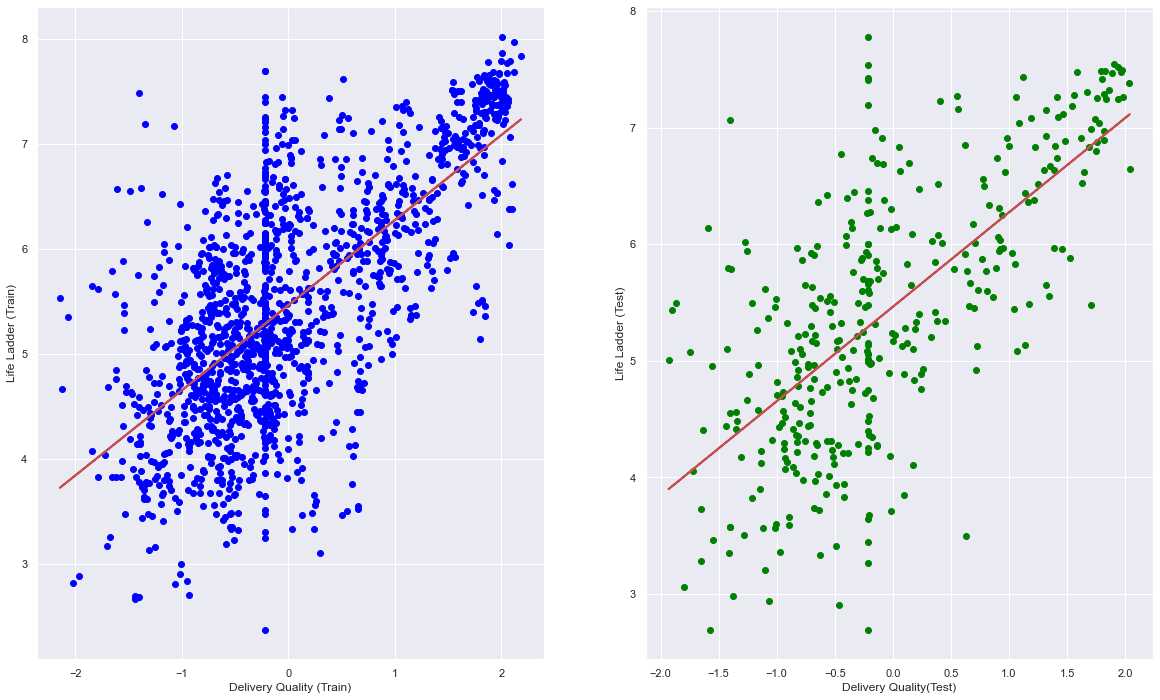

Confidence in national government: 0.003884375952914354

Generosity: 0.03528881154726016

Negative affect: 0.05775174780684367

Perceptions of corruption: 0.15413420246474607

Freedom to make life choices: 0.23537500054794613

Positive affect: 0.2619941730647781

Democratic Quality: 0.38954982936888405

Delivery Quality: 0.46798762679472583

Social support: 0.477764278382824

Healthy life expectancy at birth: 0.5410914256151377

Log GDP per capita: 0.6012854128846953



In [27]:
dictionary = {}
for var in data_dropped_1:
    if (var == 'year' or var == 'Life Ladder'):
        continue
    tt_list = traintest(data_dropped_1, "Life Ladder", var)
    univariate(data_dropped_1, tt_list, var, dictionary)



    
sorted_dictionary = sorted(dictionary.items(), key=lambda item: item[1])
for value in sorted_dictionary:
    print(value[0], end= ": ")
    print(value[1])
    print(end='\n')
    



#### From our results above we can see that the explained variance is extremely low for the three variable with low correlation values. As such, we have decided to drop these three variables as we concluded that they most likely have the least impact on "Life Ladder" and thus are the least important in predicting "Life Ladder".

In [28]:
data_dropped_2 = data_dropped_1.drop(['Generosity','Confidence in national government', 'Negative affect'], axis=1)

In [29]:
data_dropped_2

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality
0,2008,3.723590,7.144916,0.450662,50.799999,0.718114,0.881686,0.517637,-1.929690,-1.655084
1,2009,4.401778,7.314788,0.552308,51.200001,0.678896,0.850035,0.583926,-2.044093,-1.635025
2,2010,4.758381,7.421525,0.539075,51.599998,0.600127,0.706766,0.618265,-1.991810,-1.617176
3,2011,3.831719,7.394349,0.521104,51.919998,0.495901,0.731109,0.611387,-1.919018,-1.616221
4,2012,3.782938,7.480296,0.520637,52.240002,0.530935,0.775620,0.710385,-1.842996,-1.404078
...,...,...,...,...,...,...,...,...,...,...
1843,2015,3.703191,7.827643,0.735800,53.799999,0.667193,0.810457,0.715079,-0.892030,-1.359854
1844,2016,3.735400,7.819675,0.768425,54.400002,0.732971,0.723612,0.737636,-0.900462,-1.376520
1845,2017,3.638300,7.851042,0.754147,55.000000,0.752826,0.751208,0.806428,-0.952548,-1.350873
1846,2018,3.616480,7.896704,0.775388,55.599998,0.762675,0.844209,0.710119,-0.920905,-1.323000


---
#### Since we decided to predict 2019 "Life Ladder" . We will not use data from 2019 to do machine learning.

#### data_learn dataframe contains all the other data from other years except the year 2019.

#### data_predict contains data only in the year 2019.


In [30]:
data_learn = data_dropped_2[data_dropped_2['year']!=2019]


In [31]:
data_predict = data_dropped_2[data_dropped_2['year']==2019]

#### After splitting the data up, we will then drop the variable year as it is not useful in predicting life ladder

In [32]:
data_learn = data_learn.drop(['year'], axis=1)

In [33]:
data_predict = data_predict.drop(['year'], axis=1)

In [34]:
data_learn.head(n=20)

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality
0,3.723590,7.144916,0.450662,50.799999,0.718114,0.881686,0.517637,-1.929690,-1.655084
1,4.401778,7.314788,0.552308,51.200001,0.678896,0.850035,0.583926,-2.044093,-1.635025
2,4.758381,7.421525,0.539075,51.599998,0.600127,0.706766,0.618265,-1.991810,-1.617176
3,3.831719,7.394349,0.521104,51.919998,0.495901,0.731109,0.611387,-1.919018,-1.616221
4,3.782938,7.480296,0.520637,52.240002,0.530935,0.775620,0.710385,-1.842996,-1.404078
5,3.572100,7.499845,0.483552,52.560001,0.577955,0.823204,0.620585,-1.879709,-1.403036
6,3.130896,7.493170,0.525568,52.880001,0.508514,0.871242,0.531691,-1.773257,-1.312503
7,3.982855,7.476808,0.528597,53.200001,0.388928,0.880638,0.553553,-1.844392,-1.291593
8,4.220169,7.471376,0.559072,53.000000,0.522566,0.793246,0.564953,-1.855448,-1.394648
9,2.661718,7.472197,0.490880,52.799999,0.427011,0.954393,0.496349,-1.896539,-1.440218


---

### We decide to plot the boxplot, histogram and violin plot for each of our variable to analyse the variable

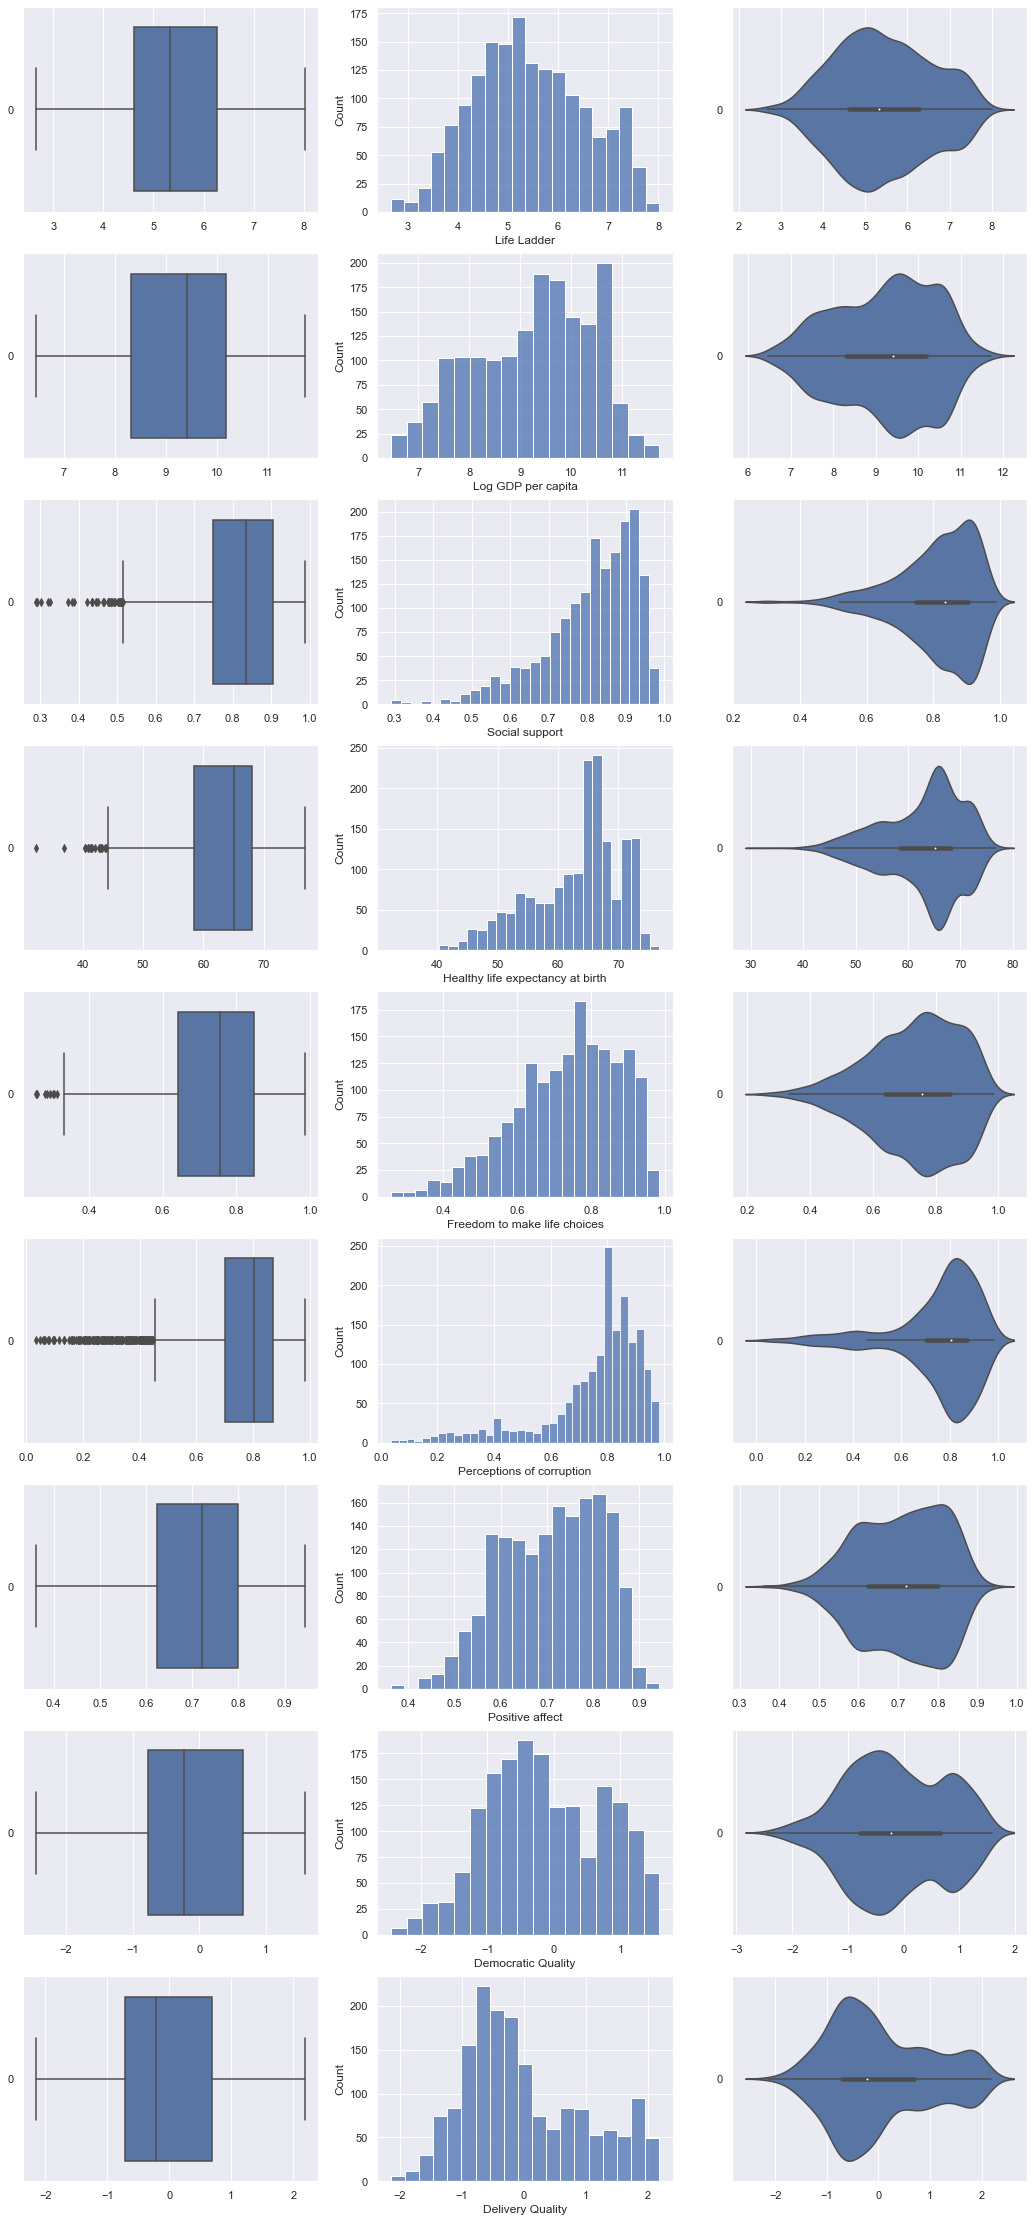

In [35]:
# Draw the distributions of all variables
f, axes = plt.subplots(9, 3, figsize=(18, 40))

count = 0
for var in data_learn:
        sb.boxplot(data = data_learn[var], orient = 'h', ax = axes[count,0])
        sb.histplot(data = data_learn[var], ax = axes[count,1])
        sb.violinplot(data = data_learn[var], orient = "h", ax = axes[count,2])
        count += 1
  

# Analysis of our variables

Based on the Boxplot, we can see that some variables have outliers and some dont. These variables include perceptions of corruption, social support, negative affect, health life expectancy at birth and freedom to make life choices.

Looking at perceptions of corruptions, data is recorded based on 2 values 1 or 0. The main bulk of the data consists of less developed countries with an unstable government. Thus, the outliers are countries with minimal to no corruption as perceived by its people.

Looking at Social support and negative affect, data is recorded based on 2 values 1 or 0 as well. Therefore, outliers would exsist as there are a range of different countries in the dataset. Thus, this would lead to wider ranger of values recroded as the situation in every country is different.




# Counting the number of outliers

In [36]:
data_learn.head(n=20)

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality
0,3.723590,7.144916,0.450662,50.799999,0.718114,0.881686,0.517637,-1.929690,-1.655084
1,4.401778,7.314788,0.552308,51.200001,0.678896,0.850035,0.583926,-2.044093,-1.635025
2,4.758381,7.421525,0.539075,51.599998,0.600127,0.706766,0.618265,-1.991810,-1.617176
3,3.831719,7.394349,0.521104,51.919998,0.495901,0.731109,0.611387,-1.919018,-1.616221
4,3.782938,7.480296,0.520637,52.240002,0.530935,0.775620,0.710385,-1.842996,-1.404078
5,3.572100,7.499845,0.483552,52.560001,0.577955,0.823204,0.620585,-1.879709,-1.403036
6,3.130896,7.493170,0.525568,52.880001,0.508514,0.871242,0.531691,-1.773257,-1.312503
7,3.982855,7.476808,0.528597,53.200001,0.388928,0.880638,0.553553,-1.844392,-1.291593
8,4.220169,7.471376,0.559072,53.000000,0.522566,0.793246,0.564953,-1.855448,-1.394648
9,2.661718,7.472197,0.490880,52.799999,0.427011,0.954393,0.496349,-1.896539,-1.440218


In [37]:
data_learn = data_learn.reset_index()

In [38]:
length = data_learn.shape[0]
for i in data_learn:
    outliers = 0
    q1 = np.percentile(data_learn[i], 25)
    q3 = np.percentile(data_learn[i], 75)
    iqr = q3 - q1
    print(i, "q1:", q1,"q3:", q3, "iqr:", iqr)
    for j in range(length):
            if data_learn[i][j] > (q3 + 1.5*iqr) or data_learn[i][j] < (q1 -1.5*iqr):
                outliers += 1
    print("Outliers:", outliers)
    print("\n")

index q1: 458.25 q3: 1384.75 iqr: 926.5
Outliers: 0


Life Ladder q1: 4.612264037132263 q3: 6.267663359642029 iqr: 1.6553993225097656
Outliers: 0


Log GDP per capita q1: 8.31234073638916 q3: 10.188706159591675 iqr: 1.8763654232025146
Outliers: 0


Social support q1: 0.748606875538826 q3: 0.9041702151298523 iqr: 0.1555633395910263
Outliers: 39


Healthy life expectancy at birth q1: 58.5 q3: 68.0999984741211 iqr: 9.599998474121094
Outliers: 16


Freedom to make life choices q1: 0.6403922289609909 q3: 0.846902146935463 iqr: 0.20650991797447205
Outliers: 8


Perceptions of corruption q1: 0.7018918395042419 q3: 0.8698502331972122 iqr: 0.16795839369297028
Outliers: 164


Positive affect q1: 0.623087465763092 q3: 0.7994495928287506 iqr: 0.17636212706565857
Outliers: 0


Democratic Quality q1: -0.7756881713867188 q3: 0.647406131029129 iqr: 1.4230943024158478
Outliers: 0


Delivery Quality q1: -0.7083107531070709 q3: 0.6941063851118088 iqr: 1.4024171382188797
Outliers: 0




# Dropping outliers across all variables

In [39]:
cols = ['Life Ladder','Log GDP per capita', 'Social support','Healthy life expectancy at birth', 
        'Freedom to make life choices', 'Perceptions of corruption','Positive affect',
        'Democratic Quality','Delivery Quality'] 

Q1 = data_learn[cols].quantile(0.25)
Q3 = data_learn[cols].quantile(0.75)
IQR = Q3 - Q1

data_learn_outliersdropped = data_learn[~((data_learn[cols] < (Q1 - 1.5 * IQR)) |
                                          (data_learn[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [40]:
data_learn_outliersdropped.shape

(1492, 10)

In [41]:
data_learn_outliersdropped

,index,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality
1,1,4.401778,7.314788,0.552308,51.200001,0.678896,0.850035,0.583926,-2.044093,-1.635025
2,2,4.758381,7.421525,0.539075,51.599998,0.600127,0.706766,0.618265,-1.991810,-1.617176
3,3,3.831719,7.394349,0.521104,51.919998,0.495901,0.731109,0.611387,-1.919018,-1.616221
4,4,3.782938,7.480296,0.520637,52.240002,0.530935,0.775620,0.710385,-1.842996,-1.404078
6,6,3.130896,7.493170,0.525568,52.880001,0.508514,0.871242,0.531691,-1.773257,-1.312503
...,...,...,...,...,...,...,...,...,...,...
1705,1842,4.184451,7.826639,0.765839,52.380001,0.642034,0.820217,0.725214,-0.985267,-1.484067
1706,1843,3.703191,7.827643,0.735800,53.799999,0.667193,0.810457,0.715079,-0.892030,-1.359854
1707,1844,3.735400,7.819675,0.768425,54.400002,0.732971,0.723612,0.737636,-0.900462,-1.376520
1708,1845,3.638300,7.851042,0.754147,55.000000,0.752826,0.751208,0.806428,-0.952548,-1.350873


After dropping the outliers, we decide to look at the correlation of our variable against life ladder again to see if it improves the correlation.
---

<AxesSubplot:>

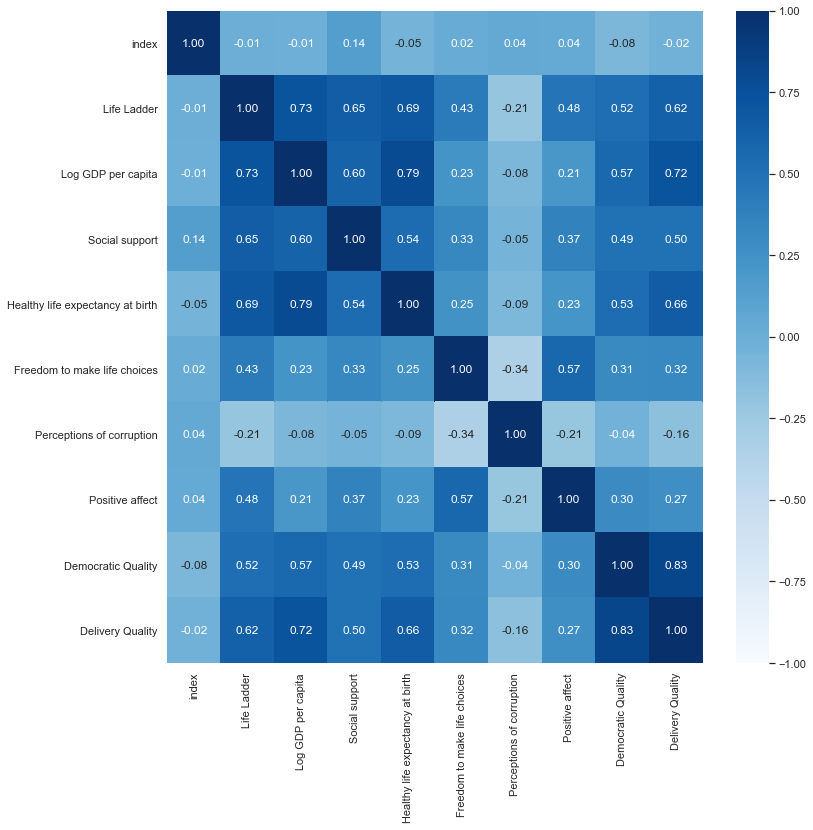

In [42]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(data_learn_outliersdropped.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f",cmap="Blues")

In [47]:
focus_cols = ['Life Ladder']
data_learn_outliersdropped.corr().filter(focus_cols).drop(focus_cols).sort_values( by = "Life Ladder",key = abs,ascending=False)

,Life Ladder
Log GDP per capita,0.725172
Healthy life expectancy at birth,0.692035
Social support,0.652065
Delivery Quality,0.618852
Democratic Quality,0.516131
Positive affect,0.476470
Freedom to make life choices,0.427604
Perceptions of corruption,-0.207300
index,-0.006387


### Looking at the correlation matrix, the correrlation between the 9 variables we chose and life ladder dropped after removing the outliers, thus we will not be removing the outliers in our analysis.

# Machine Learning

For machine learning, we decide to use regression to predict life ladder.

The models that we chose are

1. Multi Variate Linear Regression
2. Random Forest Regression
3. eXtreme Gradient Boosting Regression

We decide to use an additional cross-validation technique known as k-fold cross validation.

K-fold cross validation works by dividing our dataset into k number of folds. For each fold in your dataset, build your model on k – 1 folds of the dataset and test the model to find the performance for the kth fold. It will repeat the steps in front until each of the k-folds has become the test set exactly once.
Finally, the average of the k accuracies is called the cross-validation accuracy and it will serve as our performance metric for the model.

# Why did we decide to incoporate k-fold cross validation?

K-fold cross validation results in a less biased model compared to other methods like hold-out method that we usually use since every observation has the chance of appearing in both train and test sets.

---




# Multi Variate Linear Regression

In [36]:
data_learn.head()

,index,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality
0,0,3.723590,7.144916,0.450662,50.799999,0.718114,0.881686,0.517637,-1.929690,-1.655084
1,1,4.401778,7.314788,0.552308,51.200001,0.678896,0.850035,0.583926,-2.044093,-1.635025
2,2,4.758381,7.421525,0.539075,51.599998,0.600127,0.706766,0.618265,-1.991810,-1.617176
3,3,3.831719,7.394349,0.521104,51.919998,0.495901,0.731109,0.611387,-1.919018,-1.616221
4,4,3.782938,7.480296,0.520637,52.240002,0.530935,0.775620,0.710385,-1.842996,-1.404078


## Using hold-out cross validation with linear regression

Intercept of Regression 	: b =  [-2.26100842]
Coefficients of Regression 	: a =  [[ 0.28900592  1.89512838  0.03205007  0.37371372 -0.53689235  2.25636521
  -0.00966277  0.09802177]]

                         Predictors  Coefficients
0                Log GDP per capita      0.289006
1                    Social support      1.895128
2  Healthy life expectancy at birth      0.032050
3      Freedom to make life choices      0.373714
4         Perceptions of corruption     -0.536892
5                   Positive affect      2.256365
6                Democratic Quality     -0.009663
7                  Delivery Quality      0.098022



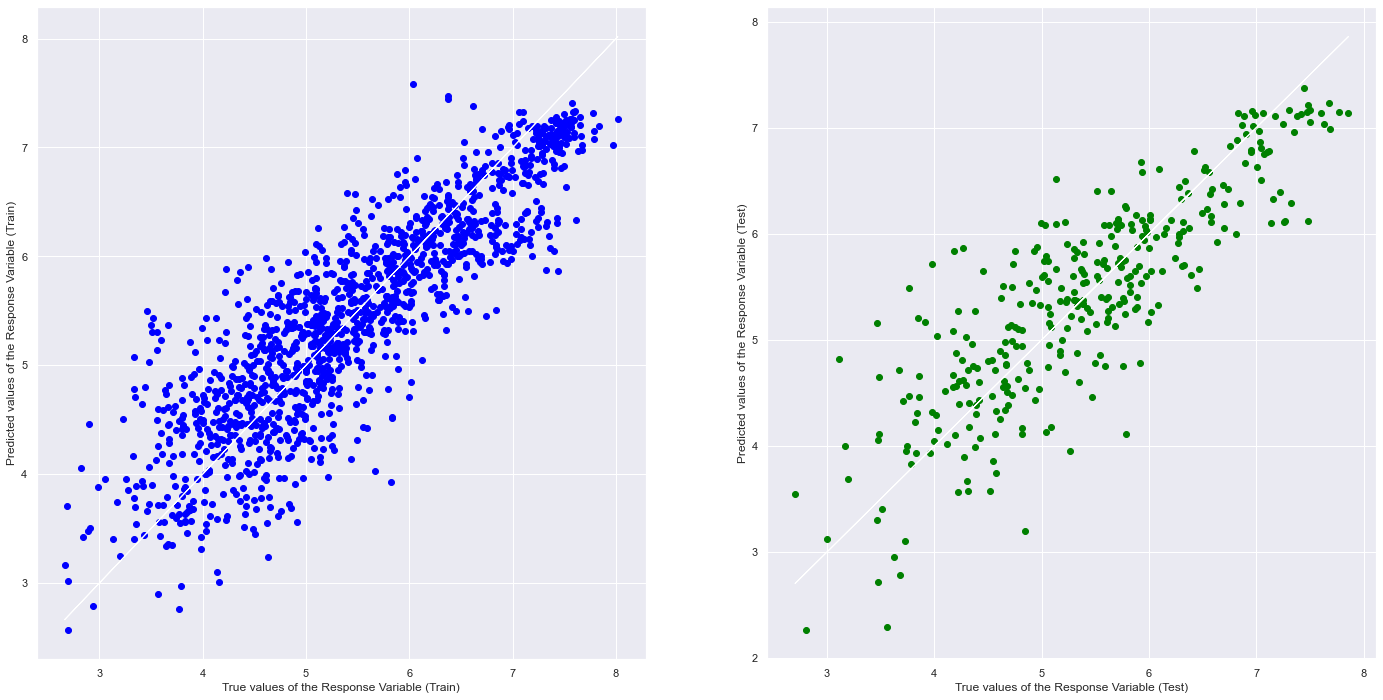

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7639750523313524
Mean Squared Error (MSE) 	: 0.30041462169189714

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.721488766669981
Mean Squared Error (MSE) 	: 0.3255203183216921



In [40]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics


# Extract Response and Predictors
y = pd.DataFrame(data_learn["Life Ladder"])
X = pd.DataFrame(data_learn[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", 
                             "Freedom to make life choices", "Perceptions of corruption", "Positive affect", 
                             "Democratic Quality", "Delivery Quality" ]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## Using k-fold cross validation with linear regression

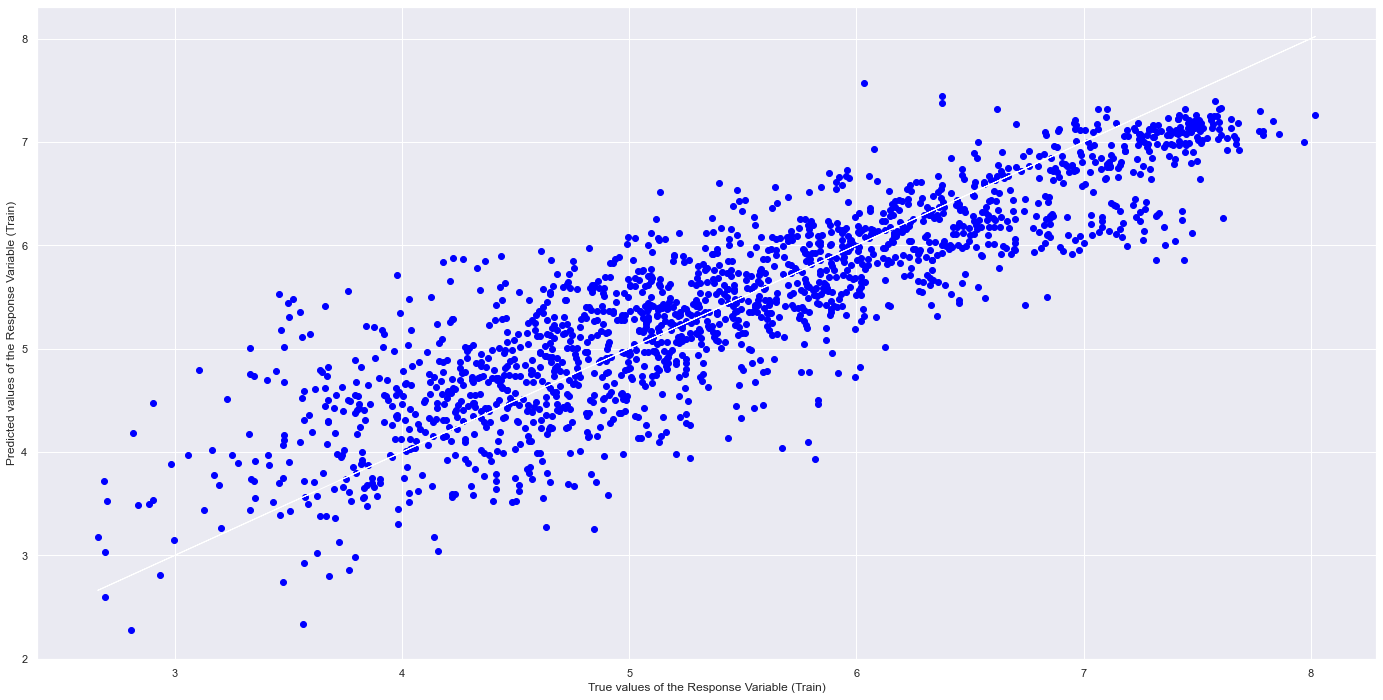

Goodness of Fit of Model 	
Scores of the model is 	: [0.7794031  0.75312542 0.77348087 0.72775014 0.7324435 ]
Explained Variance (R^2) 	: 0.7532406048969661
Mean Squared Error (MSE) 	: 0.30841598431115264



In [41]:
# Use k fold
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Extract Response and Predictors
y = pd.DataFrame(data_learn["Life Ladder"])
X = pd.DataFrame(data_learn[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", 
                             "Freedom to make life choices", "Perceptions of corruption", "Positive affect", 
                             "Democratic Quality", "Delivery Quality" ]])
kf = KFold(n_splits=5, random_state=1, shuffle=True)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
                                    # train the linear regression model
#cross_validate(linreg, X_test, y_test, cv=kf)

scores = cross_val_score(linreg,X,y,cv = kf,scoring='explained_variance')

# Predict Response corresponding to Predictors
y_predict = cross_val_predict(linreg,X,y, cv = kf)


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.scatter(y, y_predict, color = "blue")
plt.plot(y, y, 'w-', linewidth = 1)
plt.xlabel("True values of the Response Variable (Train)")
plt.ylabel("Predicted values of the Response Variable (Train)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \t")
print("Scores of the model is \t:", scores)
print("Explained Variance (R^2) \t:", scores.mean())
print("Mean Squared Error (MSE) \t:", mean_squared_error(y, y_predict))
r2_linreg = scores.mean()
print()

# Analysis of our results for linear regression model

Explained variance (R^2) for linear regression model:
1. Hold-out CV: 0.721
2. K-fold CV: 0.753

Mean Squared Error (MSE) for linear regression model:
1. Hold-out CV: 0.325
2. K-fold CV: 0.308

We can see that by using k-fold cross validation, the accuracy of our results is better.

Explained variance for both the train and test models are above 0.70 which indicates a strong relation between our response and predictor variables.

Mean squared error for k-fold cross validation is also lower than that of hold-out cross validation and it remained consistent in our test model.

---

# Random Forest Regressor


## Using hold-out cross validation with random forest regressor


In [58]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(data_learn["Life Ladder"])
X = pd.DataFrame(data_learn[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", 
                                           "Freedom to make life choices", "Perceptions of corruption", "Positive affect", 
                                           "Democratic Quality", "Delivery Quality" ]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [59]:
from sklearn.ensemble import RandomForestRegressor
rand_forest = RandomForestRegressor()

In [60]:
rand_forest.fit(X_train,y_train.values.ravel())

RandomForestRegressor()

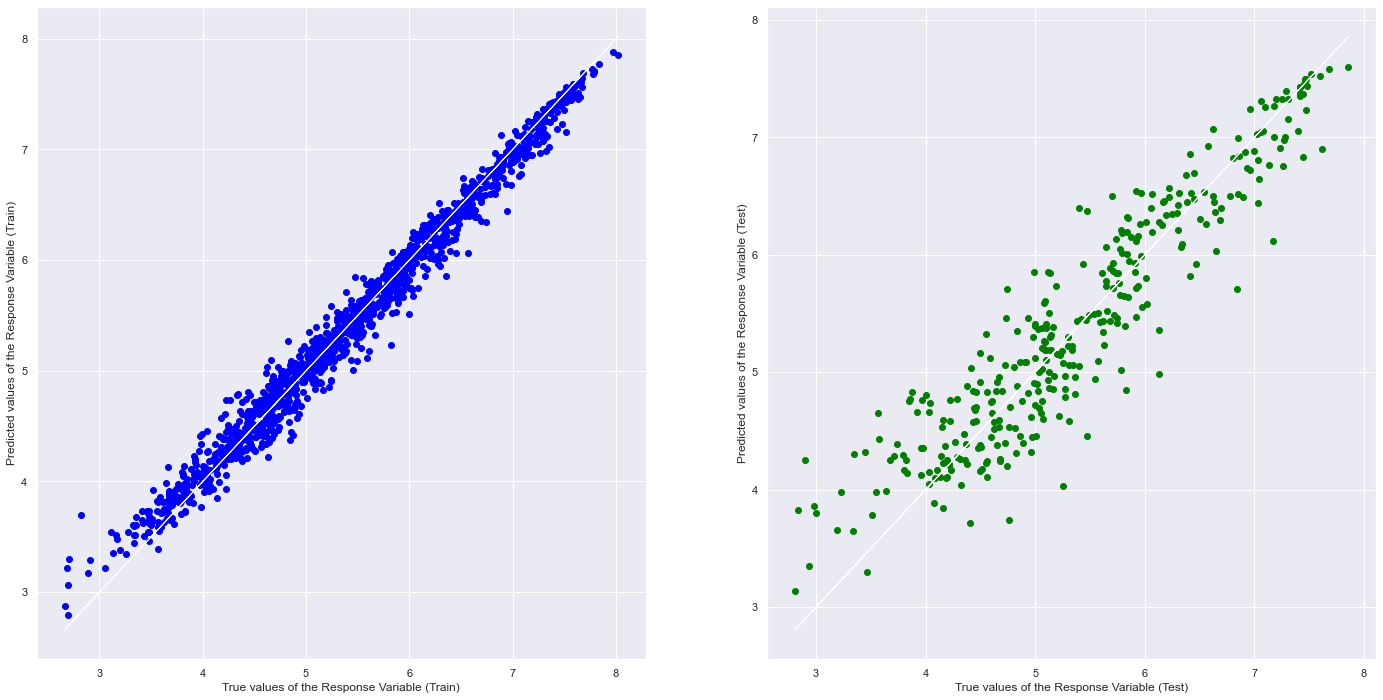

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9821122516276216
Mean Squared Error (MSE) 	: 0.022469595711751552

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8632407341204253
Mean Squared Error (MSE) 	: 0.16855150874115218



In [61]:

# Print the Coefficients against Predictors
#print(pd.DataFrame(list(zip(X_train.columns, rand_forest.coef_[0])), columns = ["Predictors", "Coefficients"]))
#print()
# Predict Response corresponding to Predictors
y_train_pred = rand_forest.predict(X_train)
y_test_pred = rand_forest.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", rand_forest.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rand_forest.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## Using k-fold cross validation with random forest regressor


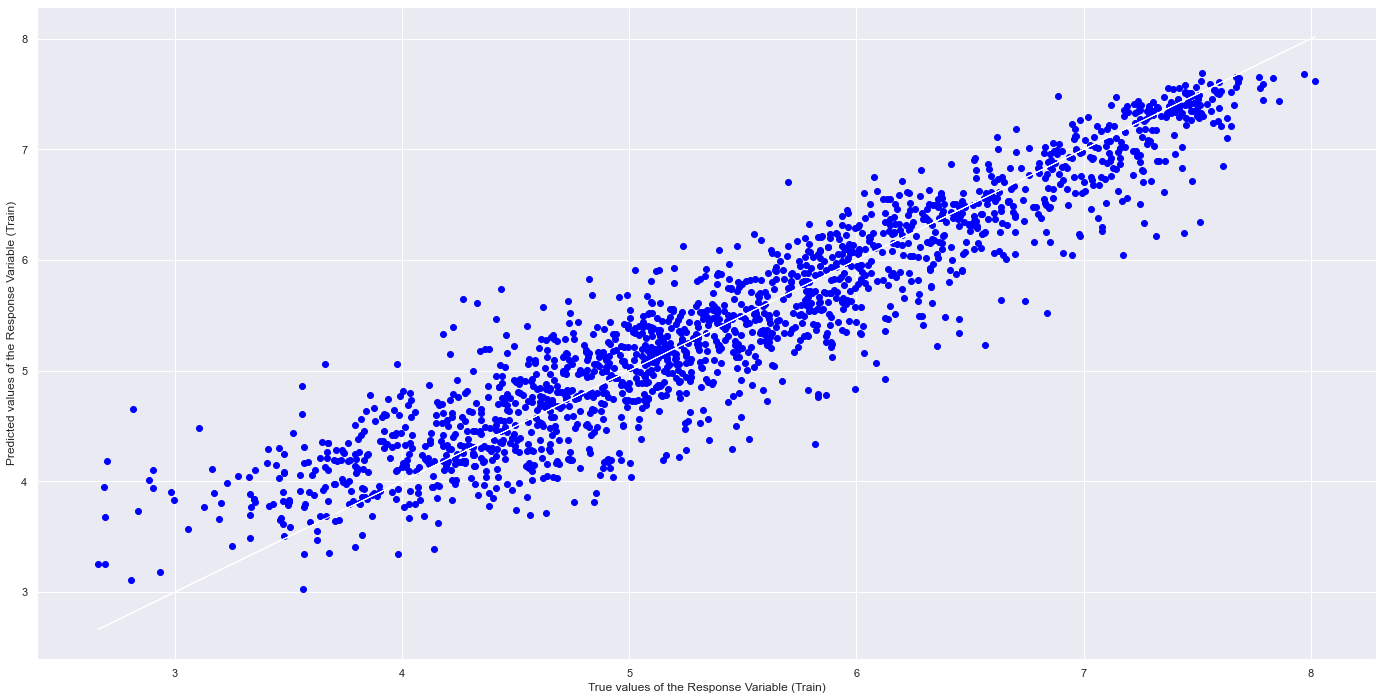

Goodness of Fit of Model 	
Scores of the model is 	: [0.88659449 0.89074927 0.88040048 0.84298767 0.8803495 ]
Explained Variance (R^2) 	: 0.8762162820214539
Mean Squared Error (MSE) 	: 0.15596938105256694



In [62]:
#using k fold
# Use k fold
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Extract Response and Predictors
y = pd.DataFrame(data_learn["Life Ladder"])
X = pd.DataFrame(data_learn[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", 
                             "Freedom to make life choices", "Perceptions of corruption", "Positive affect", 
                             "Democratic Quality", "Delivery Quality" ]])
kf = KFold(n_splits=5, random_state=1, shuffle=True)

# Linear Regression using Train Data
from sklearn.ensemble import RandomForestRegressor
rand_forest1 = RandomForestRegressor()


scores = cross_val_score(rand_forest1,X,y.values.ravel(),cv = kf,scoring='explained_variance')

# Predict Response corresponding to Predictors
y_predict = cross_val_predict(rand_forest1,X,y.values.ravel(), cv = kf)


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.scatter(y, y_predict, color = "blue")
plt.plot(y, y, 'w-', linewidth = 1)
plt.xlabel("True values of the Response Variable (Train)")
plt.ylabel("Predicted values of the Response Variable (Train)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \t")
print("Scores of the model is \t:", scores)
print("Explained Variance (R^2) \t:", scores.mean())
print("Mean Squared Error (MSE) \t:", mean_squared_error(y, y_predict))
r2_rand_forest = scores.mean()
print()

# Analysis of our results for random forest regressor

Explained variance (R^2) for random forest regressor:
1. Hold-out CV: 0.863
2. K-fold CV: 0.876

Mean Squared Error (MSE) for random forest regressor:
1. Hold-out CV: 0.168
2. K-fold CV: 0.156

We can see that by using k-fold cross validation with random forest regressor, the accuracy of our results is better.

Explained variance for our test models are higher which indicates a stronger relation between our response and predictor variables when k-fold cross validation was used.

Mean squared error for k-fold cross validation is also lower than that of hold-out cross validation and it remained consistent in our test model.

---

# eXtreme Gradient Boosting Regression

## Using hold-out cross validation with eXtreme Gradient Boosting Regression


In [63]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(data_learn["Life Ladder"])
X = pd.DataFrame(data_learn[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", 
                             "Freedom to make life choices", "Perceptions of corruption", "Positive affect", 
                             "Democratic Quality", "Delivery Quality" ]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [64]:
# check xgboost version
import xgboost as xgb

In [65]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [66]:
xgb_r.fit(X_train,y_train.values.ravel())

[17:50:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=123, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

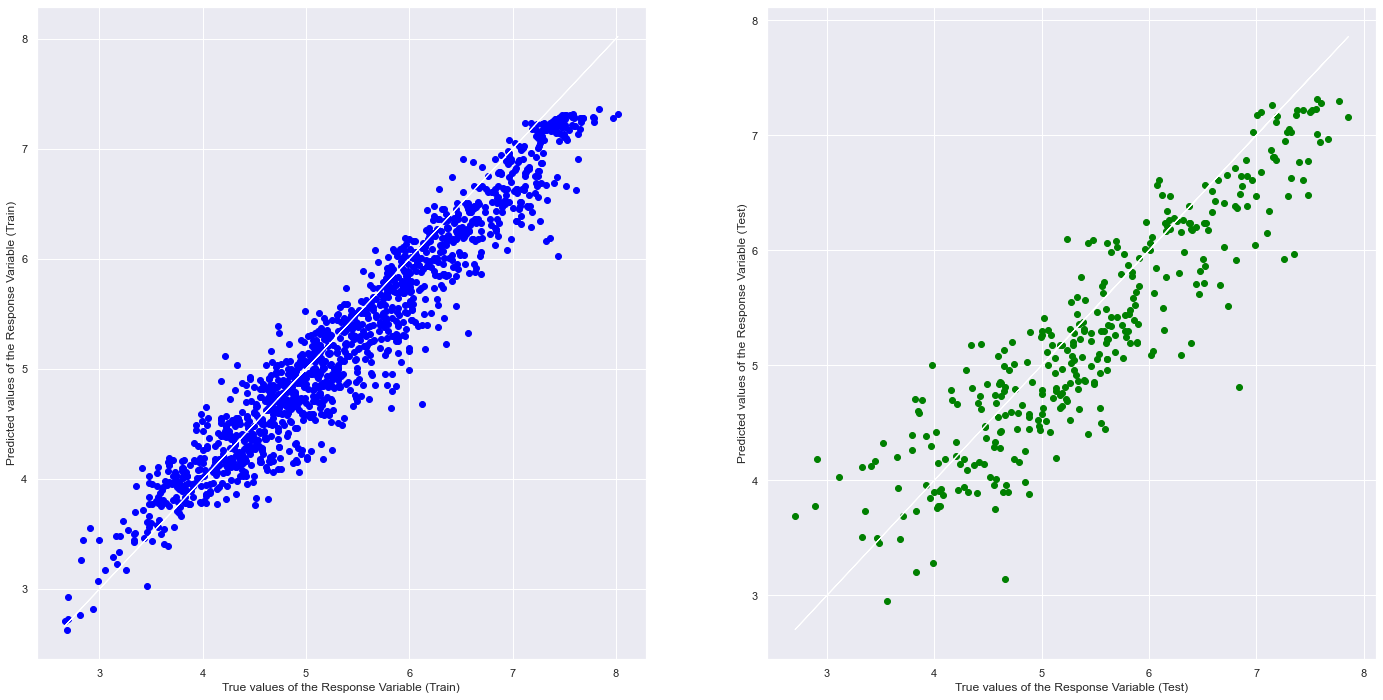

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9076060724629655
Mean Squared Error (MSE) 	: 0.11703094174218899

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7915455820764519
Mean Squared Error (MSE) 	: 0.2490367958011315



In [67]:
# Predict Response corresponding to Predictors
y_train_pred = xgb_r.predict(X_train)
y_test_pred = xgb_r.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xgb_r.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xgb_r.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

## Using k-fold cross validation with eXtreme Gradient Boosting Regression


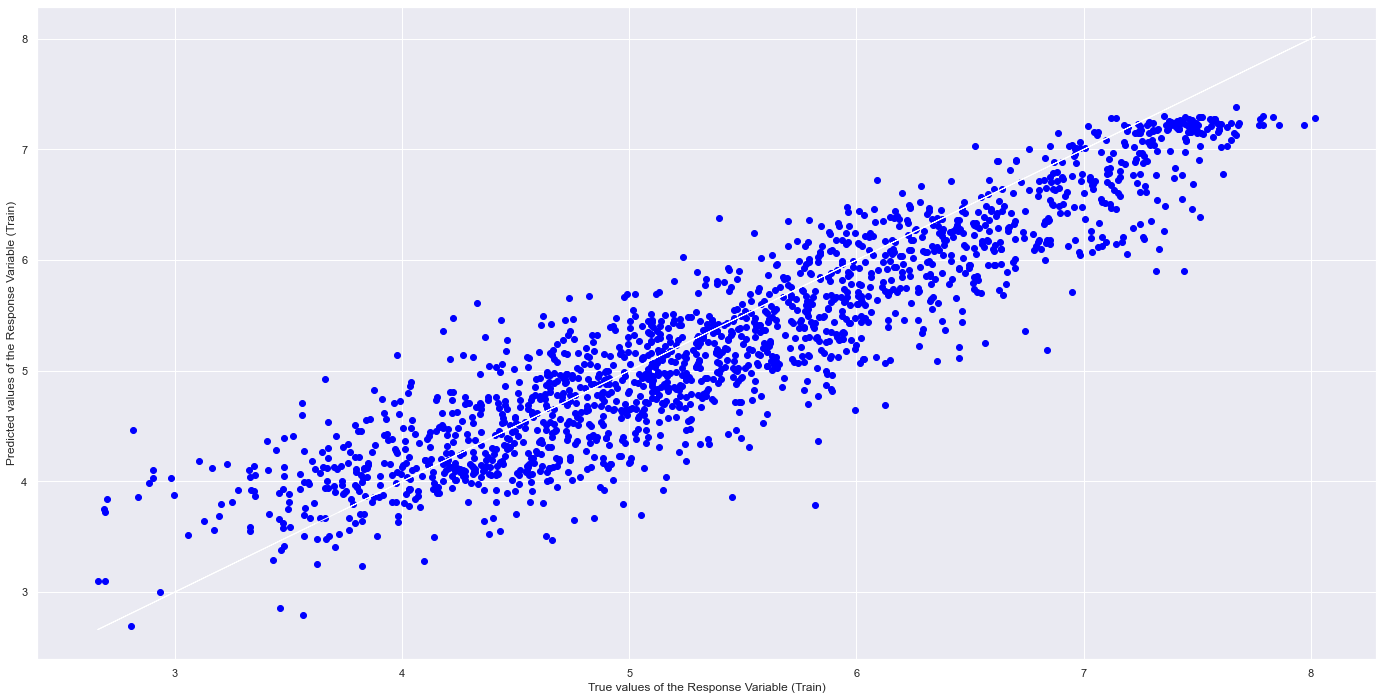

Goodness of Fit of Model 	
Scores of the model is 	: [0.85803256 0.85442201 0.85630996 0.80772294 0.84900812]
Explained Variance (R^2) 	: 0.8450991187715999
Mean Squared Error (MSE) 	: 0.2162859744754668



In [69]:
#using k fold
# Use k fold
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Extract Response and Predictors
y = pd.DataFrame(data_learn["Life Ladder"])
X = pd.DataFrame(data_learn[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", 
                             "Freedom to make life choices", "Perceptions of corruption", "Positive affect", 
                             "Democratic Quality", "Delivery Quality" ]])
kf = KFold(n_splits=5, random_state=1, shuffle=True)

# Linear Regression using Train Data
import xgboost as xgb
xgb_r = xgb.XGBRegressor(objective ='reg:linear',verbosity = 0,
                  n_estimators = 10, seed = 123)

scores = cross_val_score(xgb_r,X,y.values.ravel(),cv = kf,scoring='explained_variance')

# Predict Response corresponding to Predictors
y_predict = cross_val_predict(xgb_r,X,y.values.ravel(), cv = kf)


# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 1, figsize=(24, 12))
plt.scatter(y, y_predict, color = "blue")
plt.plot(y, y, 'w-', linewidth = 1)
plt.xlabel("True values of the Response Variable (Train)")
plt.ylabel("Predicted values of the Response Variable (Train)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \t")
print("Scores of the model is \t:", scores)
print("Explained Variance (R^2) \t:", scores.mean())
print("Mean Squared Error (MSE) \t:", mean_squared_error(y, y_predict))
r2_xgb = scores.mean()
print()

# Analysis of our results for eXtreme Gradient Boosting Regression

Explained variance (R^2) for eXtreme Gradient Boosting Regression:
1. Hold-out CV: 0.791
2. K-fold CV: 0.845 

Mean Squared Error (MSE) for eXtreme Gradient Boosting Regression:
1. Hold-out CV: 0.249
2. K-fold CV: 0.216 

We can see that by using k-fold cross validation with eXtreme Gradient Boosting Regression, the accuracy of our results is better.

Explained variance for our test models are higher which indicates a stronger relation between our response and predictor variables when k-fold cross validation is used.

Mean squared error for k-fold cross validation is also lower than that of hold-out cross validation and it remained consistent in our test model.


---

# Analysis of the accuracy of our regression models

We decide to visualise the accuracy of our model by plotting the boxplot with the explained variance of each model

In [70]:
classifiers_names = ['Multi Variate Linear Regression',
                     'Random Forest Regression',
                     'eXtreme Gradient Boosting Regression',
                     ]

regressors = [('Multi Variate Linear Regression', linreg), ('Random Forest', rand_forest), 
              ('eXtreme Gradient Boosting Regressor', xgb_r)]

In [71]:
classifiers_names

['Multi Variate Linear Regression',
 'Random Forest Regression',
 'eXtreme Gradient Boosting Regression']

<AxesSubplot:ylabel='Explained Variance for test data'>

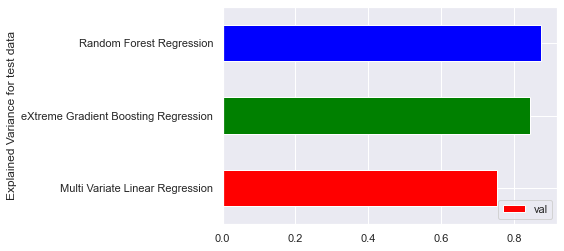

In [72]:
df = pd.DataFrame({'Explained Variance for test data':['Multi Variate Linear Regression', 'Random Forest Regression', 'eXtreme Gradient Boosting Regression'], 'val':[r2_linreg, r2_rand_forest, r2_xgb]})
df_sorted = df.sort_values('val')
df_sorted.plot.barh(x='Explained Variance for test data', y='val', color = ['red','green','blue'])

## Upon comparing their explained variance values, we see that Random Forest Regressor (RFR) had the highest among the 3 models. We will thus be using our current fitted RFR model (from year 2000-2018) to predict the life ladder values of the year 2019.
---

# Prediction of new data with our Random Forest Regressor model that we learned previously


In [73]:
data_predict.shape

(138, 9)

In [74]:
data_predict.head(n=20)

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality
11,2.375092,7.458469,0.419973,52.400002,0.393656,0.923849,0.351387,-0.225939,-0.216634
23,4.995318,9.456569,0.686365,69.000000,0.777351,0.914284,0.681080,-0.225939,-0.216634
31,4.744627,9.537369,0.803259,66.099998,0.385083,0.740609,0.584944,-0.225939,-0.216634
49,6.085561,9.772140,0.896371,69.000000,0.817053,0.830460,0.825965,-0.225939,-0.216634
75,7.233995,10.725492,0.942774,73.900002,0.917537,0.430209,0.770044,-0.225939,-0.216634
87,7.195361,10.756180,0.964489,73.300003,0.903428,0.457089,0.774459,-0.225939,-0.216634
101,5.173389,9.704785,0.886756,65.800003,0.854249,0.457261,0.642547,-0.225939,-0.216634
124,5.114217,8.323947,0.673172,64.800003,0.901937,0.656005,0.537235,-0.225939,-0.216634
138,5.821453,9.802853,0.916740,66.400002,0.656934,0.545905,0.590851,-0.225939,-0.216634
151,6.772138,10.682823,0.884230,72.199997,0.776204,0.672498,0.733456,-0.225939,-0.216634


In [75]:
data_2019_life_ladder = data_predict['Life Ladder']

In [76]:
data_2019_life_ladder.head()

11    2.375092
23    4.995318
31    4.744627
49    6.085561
75    7.233995
Name: Life Ladder, dtype: float64

In [77]:
data_predict = data_predict.drop(['Life Ladder'],axis =1)

Change the life ladder of 2019 dataframe to a list

In [78]:
list_2019_life_ladder =data_2019_life_ladder.values.tolist()

In [79]:
data_predict_list = data_predict.values.tolist()

In [80]:
count =0
error_total =0
for i in data_predict_list:
    predicted = rand_forest.predict([i])[0]
    actual =list_2019_life_ladder[count]
    error = (abs(predicted - actual))/actual*100
    count += 1
    error_total += error

print(error_total/count)
accuracy = 100-error_total/count
print(accuracy)

9.511980083832997
90.488019916167


# Analysis of the results above

Using our fitted RFR model, we predicted the values of the life ladder for each row using the (.predict) function.

We then calculated the total absolute error resulting from the prediction by summing the difference between the actual and predicted values

Finally, we calculated the the accuracy of our model which we have found to be 90.49%.

Based on this accuracy score, it is same to assume that our model is successful in achieving its purpose.

---
# Conclusion and Recommendation

#### The most important variables in predicting life ladder

Looking at the correlation and explained variance of the variables in our dataset, these are the three most important variables in predicting life ladder as their correlation and explained variance values were the highest.
1. Log gdp per capita
2. Social Support
3. Health life Expectancy at birth

Therefore, Singapore should focus on improving these 3 components to bring out the best increase in health ladder.

#### The best model in predicting life ladder

We concluded that random forest regressor is the best model to predict life ladder across the three models that we used.

Countries that wish to predict their life ladder should use random forest regressor.


---

## Annex A (GWP Questions)

Social support <br>
1. “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

Freedom to make life choices <br>
1. “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

Generosity : <br>
1. “Have you donated money to a charity in the past month?”

Perceptions of corruption <br>
1. “Is corruption widespread throughout the government or not?”

2. “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corrup tion-perception measure.

Positive affect
1. “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Happiness?”
2. “Did you smile or laugh a lot yesterday?”
3. “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Enjoyment?”

Negative affect
1.  “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Worry?”
2. “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Sadness?”
3. “Did you experience the following feelings during A LOT OF THE DAY yesterday? How about Anger?”


